In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

These are some of the important packages which we need despite of the project. These are like some of the basic and powerful packages which halps to make the life of a person performing Data Analysis and Preprocessing easier. Below is the explanation of those packages and their uses.



1.   pandas :  Pandas a python library, used for Exploratory Data Analysis like data manipulation, data cleaning, data extraction etc.
2. numpy: NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.text
3. matplotlib.pyplot:Matplotlib library, is used in Python for visualisations.
4. %matplotlib inline: Allows Matplotlib generated plots to be displayed within the Jupyter Notebook.




In [2]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


This is a Data Visualization Package, which most of the systems dont have by default. Hence, it is better to perform this step to avoid any errors in the future.

In [3]:
import plotly.express as px

Importing the above installed package here.

In [4]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


This is a Data Visualization Package, which most of the systems dont have by default. Hence, it is better to perform this step to avoid any errors in the future.

In [5]:
#for interactive visualisations
import seaborn as sns

Importing the above installed package here.

# Data Loading

In [6]:
#For ease of use let the first dataset of health insurance be named as df_i
import pandas as pd
# Load the CSV file
df_i = pd.read_csv('../data/health_insurance.csv')
# Display the data
print(df_i.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In order to play with the data, initial step is to have Data. And this is what we are doing here. We are importing a package called pandas which helps us here to read a '.csv' file. We have our data in this format, and it is not a restriction to have it in this specific way. Using the 'pd.read_csv()' function, combined with the path of the dataset, we can load our dataset here.

Here, we are loading it into 'df_i'.

And using the '.head() function, we can print the first 5 rows of our dataset. We can alternatively use the '.tail()' function to print the bottom 5 rows of our dataset.

# Data Exploration

In [7]:
df_i.shape

(2038, 7)

The '.shape' affixed with tyhe dataset name, will dsiplay the dimensions of the datset as a tuple in the order of (number of rows, number of columns).

In [8]:
df_i.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

The '.columns' is used to know the features present in our dataset.

In [9]:
df_i.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

As we can see above, '.dtypes' helps in knowing the data type of all the features present in our dataset.

**Explanation for each column and its type**

Unique values

In [10]:
var = ['age','sex','children','smoker','region']
for i in var:
  print('---------------------------------------')
  print("The unique values for", i)
  print(df_i[i].unique())
  print('---------------------------------------')

---------------------------------------
The unique values for age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39 83
 84 72 78 70 87 67 79 82 65 73 88 69 86 81 66 80 68 77 85 74 76 71 75]
---------------------------------------
---------------------------------------
The unique values for sex
['female' 'male']
---------------------------------------
---------------------------------------
The unique values for children
[0 1 3 2 5 4]
---------------------------------------
---------------------------------------
The unique values for smoker
['yes' 'no']
---------------------------------------
---------------------------------------
The unique values for region
['southwest' 'southeast' 'northwest' 'northeast']
---------------------------------------


This piece of code helps in printing the unique values present in each column. We are using a 'for' loop to iterate through the columns, and using the '.unique()' function affixed to the dataset, will produce the unique values in each and every column.

In [11]:
var_count = ['age','sex','children','smoker','region']
for i in var_count:
  print('---------------------------------------')
  print("The value counts for", i)
  print(df_i[i].value_counts())
  print('---------------------------------------')


---------------------------------------
The value counts for age
19    81
18    79
48    51
38    48
52    44
      ..
76     7
85     6
74     6
75     6
71     5
Name: age, Length: 71, dtype: int64
---------------------------------------
---------------------------------------
The value counts for sex
male      1026
female    1012
Name: sex, dtype: int64
---------------------------------------
---------------------------------------
The value counts for children
0    697
1    447
2    356
3    276
4    141
5    121
Name: children, dtype: int64
---------------------------------------
---------------------------------------
The value counts for smoker
no     1472
yes     566
Name: smoker, dtype: int64
---------------------------------------
---------------------------------------
The value counts for region
southeast    535
northwest    506
southwest    505
northeast    492
Name: region, dtype: int64
---------------------------------------


Above, we have printed the unique values in each column, and it is important to have a knowledge of the count of those variables. Hence, similar to the above mentioned way, we iterate through all the columns using a 'for' loop, and with the aid of '.value_counts()' function, we can achieve this.

In [12]:
df_i.describe()
#describe works only for numerical values and not for categorical variables

age          bmi     children       charges
count  2038.000000  2038.000000  2038.000000   2038.000000
mean     43.808145    32.051407     1.548577  22870.504905
std      17.722926     8.184664     1.526833  20415.319803
min      18.000000    15.960000     0.000000   1121.873900
25%      29.000000    26.220000     0.000000   6552.580163
50%      43.000000    31.130000     1.000000  13399.573150
75%      56.000000    36.955000     3.000000  38448.102953
max      88.000000    53.130000     5.000000  63770.428010

The 'describe()' function provides a quick overview of the basic statistical measures of the data in a DataFrame. It generates various summary statistics, including measures like mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum.

This information can be very useful for understanding the distribution of your data, identifying outliers, and gaining insights into its central tendency and variability.

# Data Wrangling

In [13]:
#converting sex column title to gender for further usage
df_i.rename(columns={'sex': 'gender'}, inplace=True)
df_i.head()

age  gender     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [14]:
df_i['gender'] = df_i['gender'].map({'male': 0, 'female': 1})
df_i.head()

age  gender     bmi  children smoker     region      charges
0   19       1  27.900         0    yes  southwest  16884.92400
1   18       0  33.770         1     no  southeast   1725.55230
2   28       0  33.000         3     no  southeast   4449.46200
3   33       0  22.705         0     no  northwest  21984.47061
4   32       0  28.880         0     no  northwest   3866.85520

In [15]:
df_i.describe()

age       gender          bmi     children       charges
count  2038.000000  2038.000000  2038.000000  2038.000000   2038.000000
mean     43.808145     0.496565    32.051407     1.548577  22870.504905
std      17.722926     0.500111     8.184664     1.526833  20415.319803
min      18.000000     0.000000    15.960000     0.000000   1121.873900
25%      29.000000     0.000000    26.220000     0.000000   6552.580163
50%      43.000000     0.000000    31.130000     1.000000  13399.573150
75%      56.000000     1.000000    36.955000     3.000000  38448.102953
max      88.000000     1.000000    53.130000     5.000000  63770.428010

One more column added as gender. now lets do the same for Smoker and region step by step

In [16]:
df_i['smoker'] = df_i['smoker'].map({'yes': 1, 'no': 0})
df_i.head()

age  gender     bmi  children  smoker     region      charges
0   19       1  27.900         0       1  southwest  16884.92400
1   18       0  33.770         1       0  southeast   1725.55230
2   28       0  33.000         3       0  southeast   4449.46200
3   33       0  22.705         0       0  northwest  21984.47061
4   32       0  28.880         0       0  northwest   3866.85520

In [17]:
df_i["region"]  = df_i['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})
df_i.head()

age  gender     bmi  children  smoker  region      charges
0   19       1  27.900         0       1       1  16884.92400
1   18       0  33.770         1       0       2   1725.55230
2   28       0  33.000         3       0       2   4449.46200
3   33       0  22.705         0       0       3  21984.47061
4   32       0  28.880         0       0       3   3866.85520

In [18]:
df_i.describe()

age       gender          bmi     children       smoker  \
count  2038.000000  2038.000000  2038.000000  2038.000000  2038.000000   
mean     43.808145     0.496565    32.051407     1.548577     0.277723   
std      17.722926     0.500111     8.184664     1.526833     0.447986   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      29.000000     0.000000    26.220000     0.000000     0.000000   
50%      43.000000     0.000000    31.130000     1.000000     0.000000   
75%      56.000000     1.000000    36.955000     3.000000     1.000000   
max      88.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  2038.000000   2038.000000  
mean      2.483317  22870.504905  
std       1.108483  20415.319803  
min       1.000000   1121.873900  
25%       2.000000   6552.580163  
50%       2.000000  13399.573150  
75%       3.000000  38448.102953  
max       4.000000  63770.428010

In [19]:
df_i.corr()

age    gender       bmi  children    smoker    region   charges
age       1.000000  0.022994  0.117031  0.158025  0.101440  0.015817  0.526532
gender    0.022994  1.000000 -0.014280  0.024328 -0.011078 -0.007188 -0.034718
bmi       0.117031 -0.014280  1.000000  0.097577  0.074495 -0.072862  0.206219
children  0.158025  0.024328  0.097577  1.000000  0.072852 -0.017795  0.284610
smoker    0.101440 -0.011078  0.074495  0.072852  1.000000  0.000438  0.472817
region    0.015817 -0.007188 -0.072862 -0.017795  0.000438  1.000000  0.024641
charges   0.526532 -0.034718  0.206219  0.284610  0.472817  0.024641  1.000000

**Now we will check for null values**

In [20]:
df_i.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
#gender can be refilled, others can be dropped as it will not affect the dataset based on the count of rows
df_i['gender'] = df_i['gender'].fillna(df_i['gender'].mode()[0]).astype(int)
df_i.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
df_i.dropna(inplace=True)

In [23]:
df_i.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**dataset clean of any null values**

In [24]:
#create a new column for grouping based on age-bins
def func_adult_group(df):
    age_bins = [18, 32, 48, 88]
    age_labels = ['young', 'middle-aged', 'old']


    df_i['adult_group'] = df_i['age'].apply(lambda x: age_labels[0] if x < age_bins[1] else (age_labels[1] if x < age_bins[2] else age_labels[2]))

    return df

#running the function
df_i = func_adult_group(df_i)
df_i.head()

age  gender     bmi  children  smoker  region      charges  adult_group
0   19       1  27.900         0       1       1  16884.92400        young
1   18       0  33.770         1       0       2   1725.55230        young
2   28       0  33.000         3       0       2   4449.46200        young
3   33       0  22.705         0       0       3  21984.47061  middle-aged
4   32       0  28.880         0       0       3   3866.85520  middle-aged

In [25]:
#columns: 'age', 'children', 'smoker' to integer and 'bmi', 'charges' to 2 decimal place
convert_to_int = lambda x: int(float(x))
convert_to_decimal = lambda x: round(float(x), 2)

df_i[['age', 'children', 'smoker','region']] = df_i[['age', 'children', 'smoker', 'region']].applymap(convert_to_int)
df_i[['bmi', 'charges']] = df_i[['bmi', 'charges']].applymap(convert_to_decimal)

In [26]:
df_i.head()

age  gender    bmi  children  smoker  region   charges  adult_group
0   19       1  27.90         0       1       1  16884.92        young
1   18       0  33.77         1       0       2   1725.55        young
2   28       0  33.00         3       0       2   4449.46        young
3   33       0  22.70         0       0       3  21984.47  middle-aged
4   32       0  28.88         0       0       3   3866.86  middle-aged

In [27]:
#testing vlaues of new column : adult-group
dummy_values = [19, 26, 37, 43, 55, 65]
for value in dummy_values:
    print('For age',value)
    print('The adult group is:',df_i.loc[df_i['age'] == value, 'adult_group'].iloc[0])

For age 19
The adult group is: young
For age 26
The adult group is: young
For age 37
The adult group is: middle-aged
For age 43
The adult group is: middle-aged
For age 55
The adult group is: old
For age 65
The adult group is: old


BMI is used to broadly define different weight groups in adults 20 years old or older.

* Underweight: BMI is less than 18.5
* Normal weight: BMI is 18.5 to 24.9
* Overweight: BMI is 25 to 29.9
* Obese: BMI is 30 or more

In [28]:
df_i["bmi_weight_label"] = np.nan
list_df_weight = [df_i]

for val in list_df_weight:
    val.loc[val["bmi"] < 18.5, "bmi_weight_label"] = "Underweight"
    val.loc[(val["bmi"] >= 18.5) & (val["bmi"] < 24.986), "bmi_weight_label"] = "Normal Weight"
    val.loc[(val["bmi"] >= 25) & (val["bmi"] < 29.926), "bmi_weight_label"] = "Overweight"
    val.loc[val["bmi"] >= 30, "bmi_weight_label"] = "Obese"

df_i.head()

age  gender    bmi  children  smoker  region   charges  adult_group  \
0   19       1  27.90         0       1       1  16884.92        young   
1   18       0  33.77         1       0       2   1725.55        young   
2   28       0  33.00         3       0       2   4449.46        young   
3   33       0  22.70         0       0       3  21984.47  middle-aged   
4   32       0  28.88         0       0       3   3866.86  middle-aged   

  bmi_weight_label  
0       Overweight  
1            Obese  
2            Obese  
3    Normal Weight  
4       Overweight

In [29]:
obAvg = df_i["charges"].loc[df_i["bmi_weight_label"] == "Obese"].mean()

df_i["charge_average"] = np.where(df_i["charges"] > obAvg, "Above Avg", "Below Avg")
df_i.head()

age  gender    bmi  children  smoker  region   charges  adult_group  \
0   19       1  27.90         0       1       1  16884.92        young   
1   18       0  33.77         1       0       2   1725.55        young   
2   28       0  33.00         3       0       2   4449.46        young   
3   33       0  22.70         0       0       3  21984.47  middle-aged   
4   32       0  28.88         0       0       3   3866.86  middle-aged   

  bmi_weight_label charge_average  
0       Overweight      Below Avg  
1            Obese      Below Avg  
2            Obese      Below Avg  
3    Normal Weight      Below Avg  
4       Overweight      Below Avg

### Adding Stress Level
*  BMI + Children / Age

In [30]:
df_i["stress"] = df_i["children"] * df_i["age"] / df_i["bmi"]

df_i.head()

age  gender    bmi  children  smoker  region   charges  adult_group  \
0   19       1  27.90         0       1       1  16884.92        young   
1   18       0  33.77         1       0       2   1725.55        young   
2   28       0  33.00         3       0       2   4449.46        young   
3   33       0  22.70         0       0       3  21984.47  middle-aged   
4   32       0  28.88         0       0       3   3866.86  middle-aged   

  bmi_weight_label charge_average    stress  
0       Overweight      Below Avg  0.000000  
1            Obese      Below Avg  0.533017  
2            Obese      Below Avg  2.545455  
3    Normal Weight      Below Avg  0.000000  
4       Overweight      Below Avg  0.000000

**DATA VISUALISATION**

Scatter Plots

Explore the relationship between age and charges using a regression plot

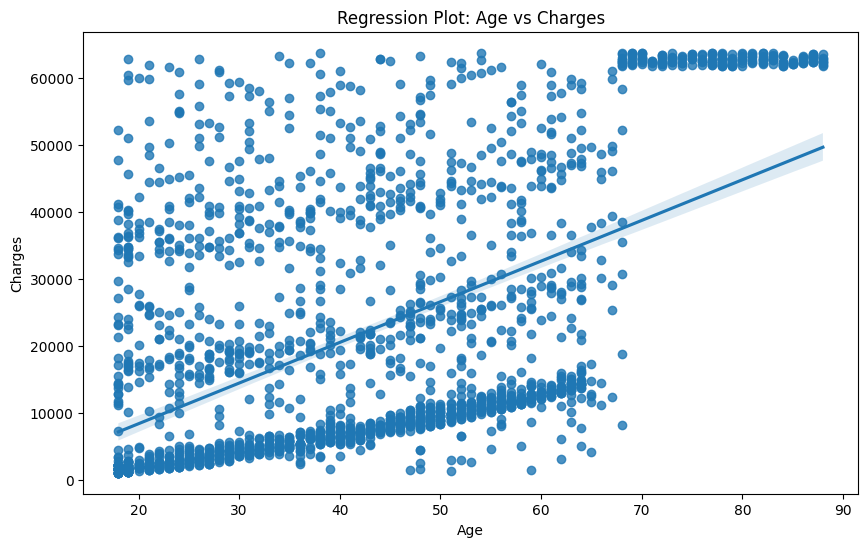

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='charges', data=df_i)
plt.title('Regression Plot: Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


In [32]:
# as the age group above 70 have values that would lead to biasness, we would drop the rows above age 70
df_i = df_i[df_i['age'] <= 70]

The pairplot for "age," "bmi," and "charges" that has the "smoker" colour enables a visual examination of the differences in the associations between these variables between smokers and non-smokers. It facilitates the identification of probable variations in the two gro#ups' ages, BMIs, and charges:

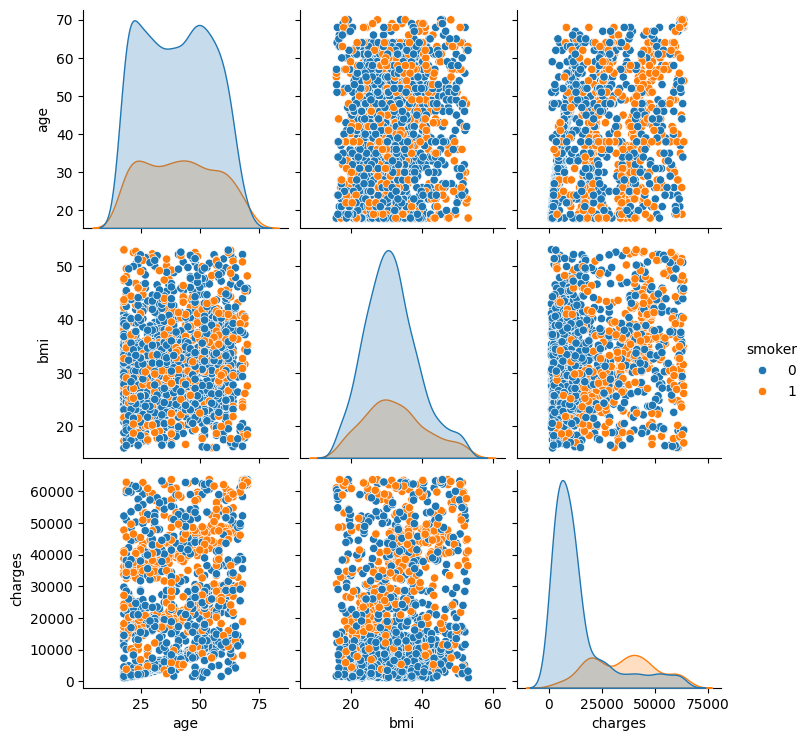

In [33]:
sns.pairplot(df_i, hue='smoker', vars=['age', 'bmi', 'charges'])
plt.show()

This code creates a scatter plot visualizing the connection between BMI and insurance charges. Points are color-coded by stress levels (viridis palette), and the size represents age. The legend in the upper right corner indicates stress levels. This plot helps identify patterns and relationships among BMI, charges, and stress.

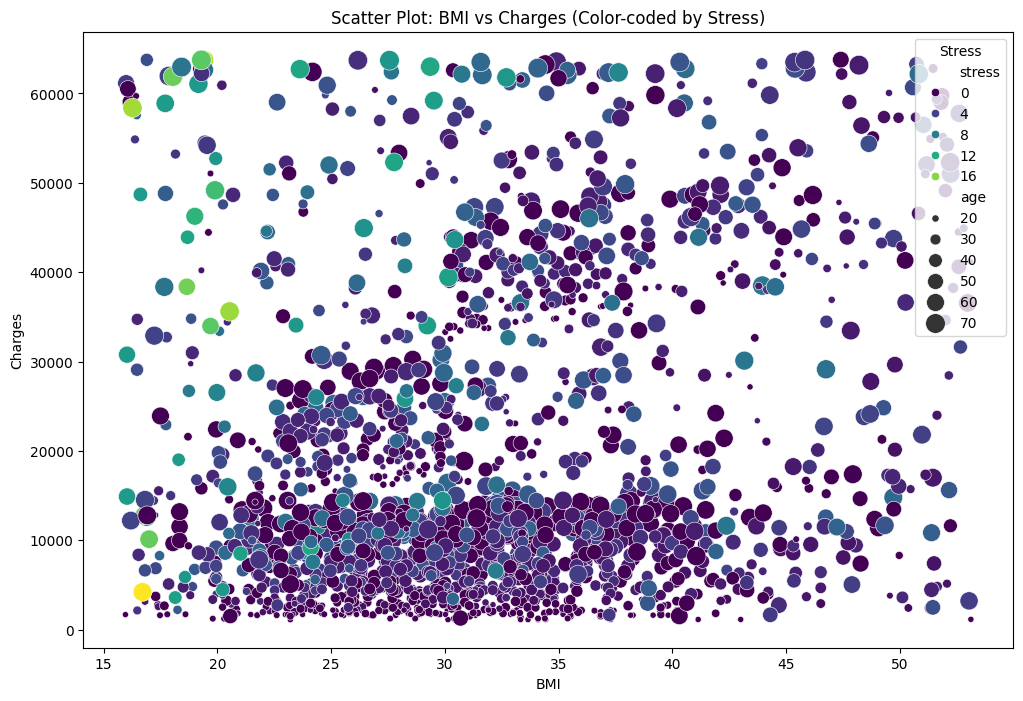

In [34]:
# Scatter plot for BMI vs Charges with color-coded Stress levels
plt.figure(figsize=(12, 8))
sc = sns.scatterplot(x='bmi', y='charges', hue='stress', data=df_i, palette='viridis', size='age', sizes=(20, 200))
plt.title('Scatter Plot: BMI vs Charges (Color-coded by Stress)')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Add a legend
plt.legend(title='Stress', loc='upper right')

plt.show()

BMI vs Charges by Adult Groups:
This code introduces a stress metric calculated as the sum of BMI and the ratio of children to age. A scatter plot is generated to see the relationship between BMI and insurance charges. The points are color-coded based on adult groups using a viridis color palette.
The plot provides insights into potential correlations between BMI, charges, and adult groups, helps in understanding how these factors interact within the dataset.

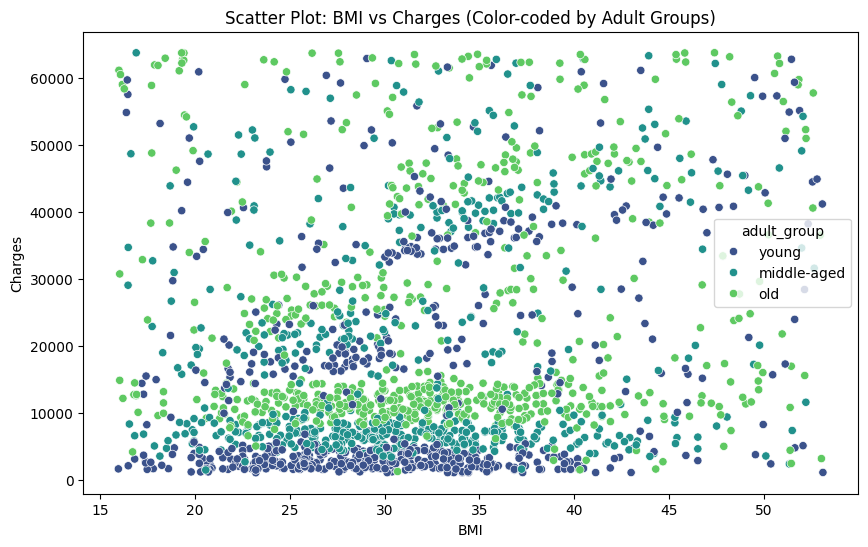

In [35]:

# Calculate stress metric
df_i['stress'] = df_i['bmi'] + df_i['children'] / df_i['age']

# Scatter plot for BMI vs Charges with color-coded Adult Groups
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='adult_group', data=df_i, palette='viridis')
plt.title('Scatter Plot: BMI vs Charges (Color-coded by Adult Groups)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

The pairplot for "age," "bmi," and "charges" that has the "no. of children" colour enables a visual examination of the differences in the associations between these variables between number of children. It facilitates the identification of probable variations in the groups' ages, BMIs, and charges.

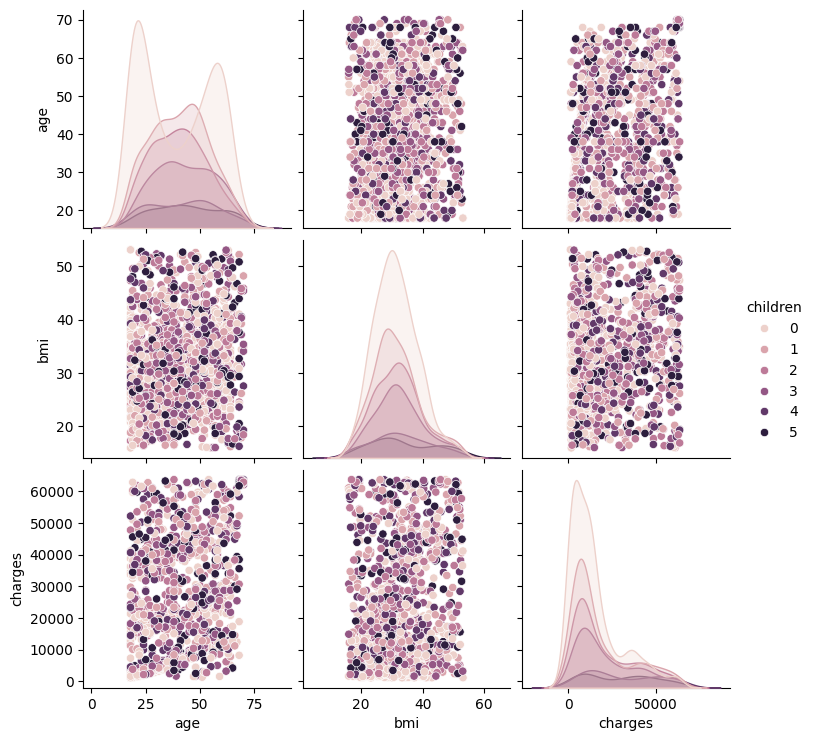

In [36]:
sns.pairplot(df_i, hue='children', vars=['age', 'bmi', 'charges'], diag_kind='kde')
plt.show()

PIE CHART

This code generates a 2x2 grid of pie charts representing key categorical distributions in the dataset:

Smoker Status:

Percentage breakdown of smokers and non-smokers.
Number of Children:

Distribution of individuals based on the number of children.
Age Groups:

Proportion of individuals in different age groups (young, middle-aged, old).
BMI Weight Labels:

Percentage distribution across BMI weight categories (Underweight, Normal Weight, Overweight, Obese).
Each pie chart provides a quick visual summary of categorical patterns in the data.

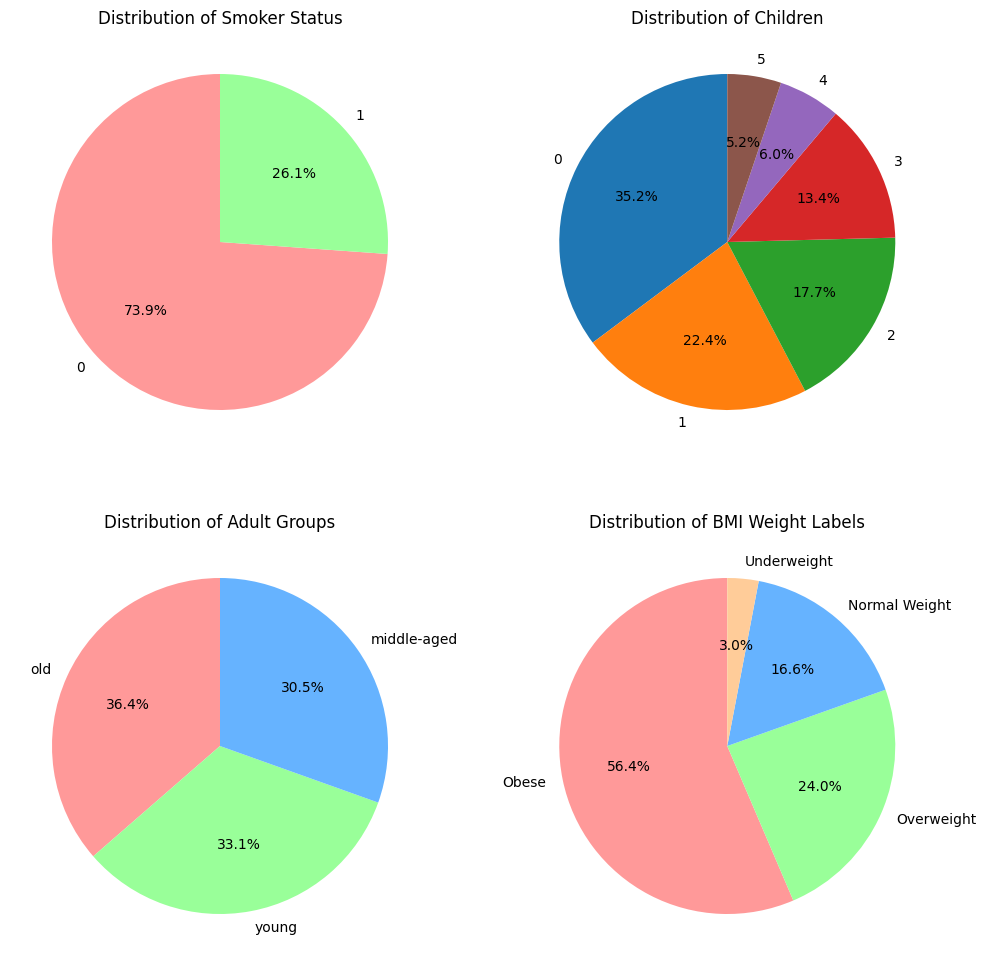

In [37]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Pie chart for Smoker status
smoker_counts = df_i['smoker'].value_counts()
axes[0, 0].pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#99ff99'])
axes[0, 0].set_title('Distribution of Smoker Status')

# Pie chart for Children
children_counts = df_i['children'].value_counts()
axes[0, 1].pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Distribution of Children')

# Pie chart for Adult Group
adult_group_counts = df_i['adult_group'].value_counts()
axes[1, 0].pie(adult_group_counts, labels=adult_group_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#99ff99', '#66b3ff'])
axes[1, 0].set_title('Distribution of Adult Groups')

# Pie chart for BMI Weight Label
bmi_weight_counts = df_i['bmi_weight_label'].value_counts()
axes[1, 1].pie(bmi_weight_counts, labels=bmi_weight_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#99ff99', '#66b3ff', '#ffcc99'])
axes[1, 1].set_title('Distribution of BMI Weight Labels')

plt.show()

BAR PLOT

Using a bar plot in this code helps visualize the relationship between the number of children (categorical data) and the charges (numerical data) while distinguishing between smokers and non-smokers (via the 'hue' parametereter).

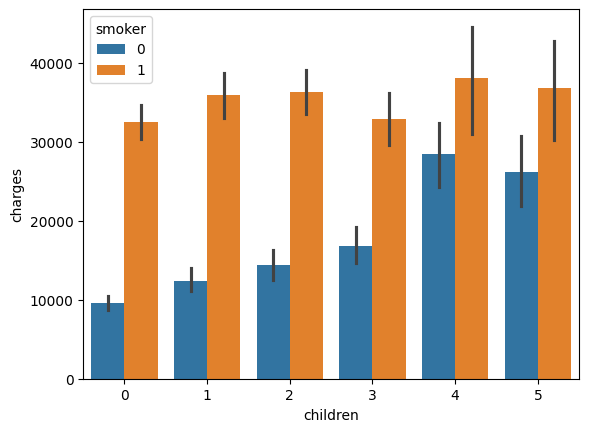

In [38]:
#This code creates a bar plot to visualize how the number of children (x-axis) influences insurance premium charges (y-axis), with differentiation by smoker status (hue).
sns.barplot(x='children', y='charges', data=df_i, hue='smoker')
plt.show()

The countplot displays the distribution of smoker and non-smoker adults in different age groups, allowing analysis of the relationship between smoking status and age group within the dataset.

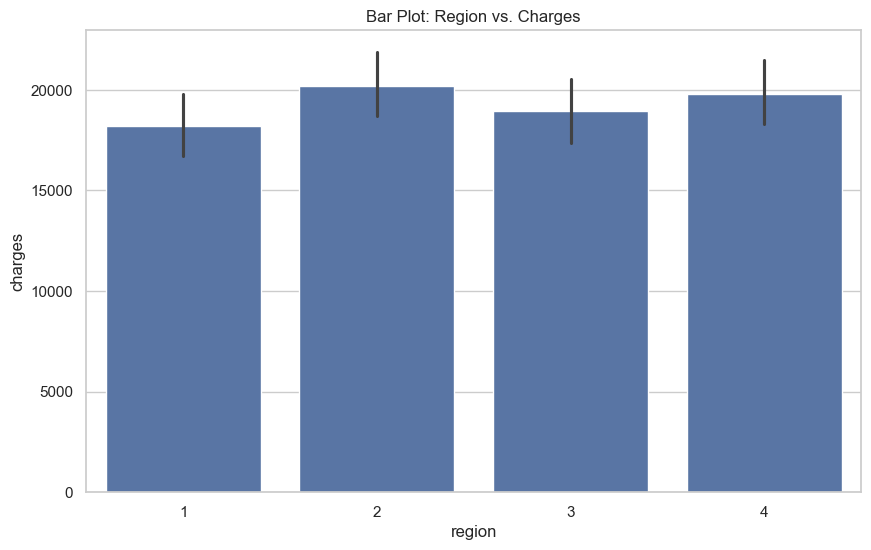

In [39]:
# # Combine the region columns to create a new 'region' column
# df_i['region'] = df_i[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].idxmax(axis=1).str.replace('region_', '')

# Set the style of Seaborn plots (optional)
sns.set(style="whitegrid")

# Bar plot for Region and Charges
plt.figure(figsize=(10, 6))
sns.barplot(data=df_i, x="region", y="charges")
plt.title("Bar Plot: Region vs. Charges")
plt.show()

BOX PLOT

This box plot is used to visually compare the distribution, central tendencies, and potential outliers of numerical variables in 's_col' for effective exploratory data analysis.


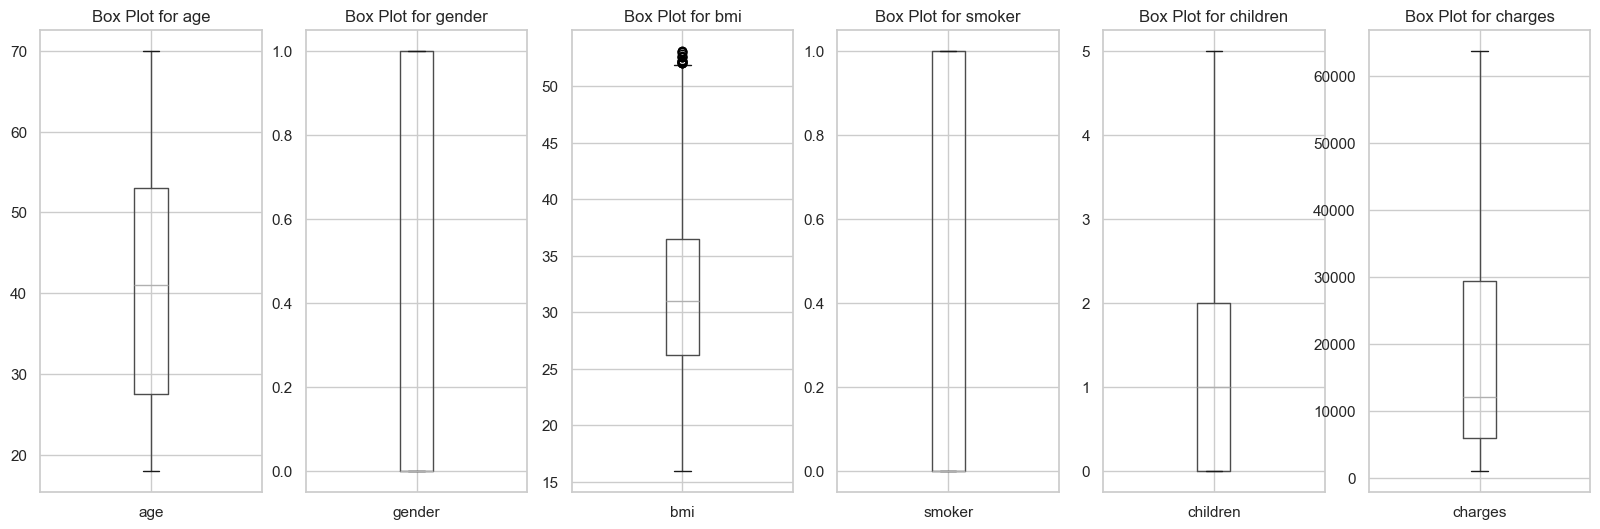

In [40]:
# Define a list of columns to create box plots for
s_col = ['age', 'gender', 'bmi', 'smoker', 'children', 'charges']
# Create a figure with subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(s_col), figsize=(20, 6))
# Iterate through the list of columns and create box plots for each
for i, column in enumerate(s_col):
    df_i.boxplot(column, ax=axes[i])
    axes[i].set_title(f'Box Plot for {column}')
# Display the entire set of box plots
plt.show()


Distribution of Charges by Smoker Status:
Exploring how charges vary between smokers and non-smokers

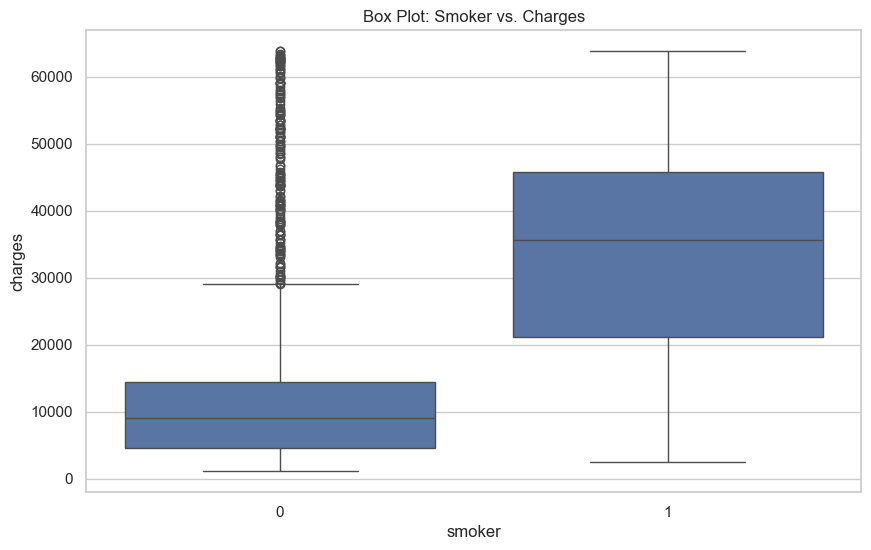

In [41]:
# Box plot for Smoker and Charges
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_i, x="smoker", y="charges")
plt.title("Box Plot: Smoker vs. Charges")
plt.show()

Distribution of Charges by Gender:
Exploring how charges vary between different genders

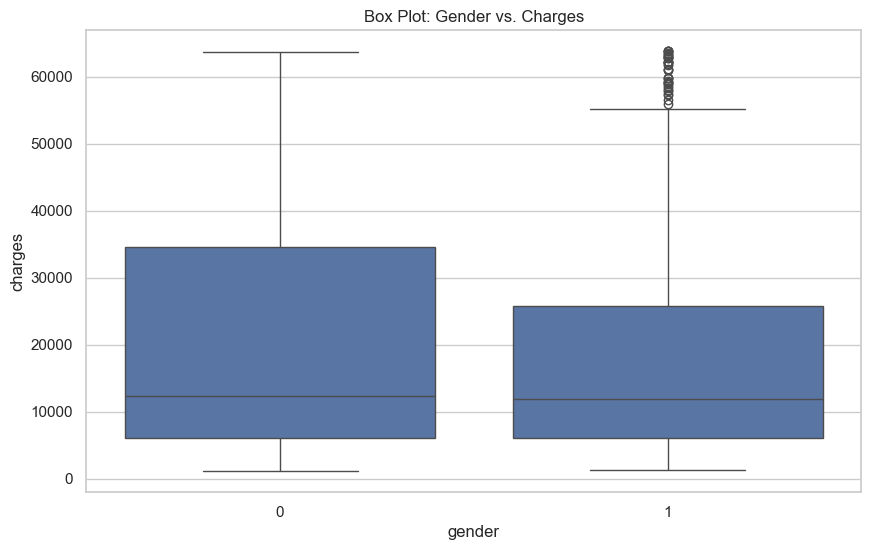

In [42]:
# Box plot for Gender and Charges
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_i, x="gender", y="charges")
plt.title("Box Plot: Gender vs. Charges")
plt.show()

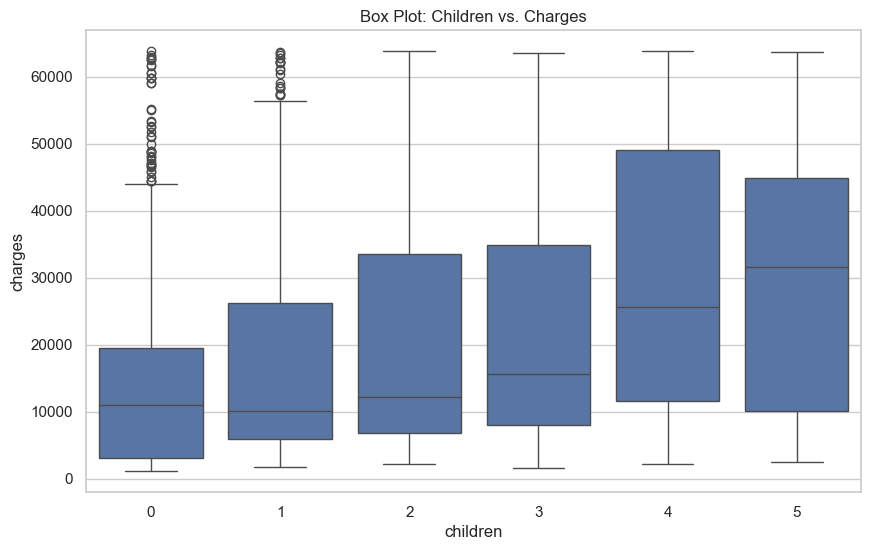

In [43]:
# Box plot for Children and Charges
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_i, x="children", y="charges")
plt.title("Box Plot: Children vs. Charges")
plt.show()

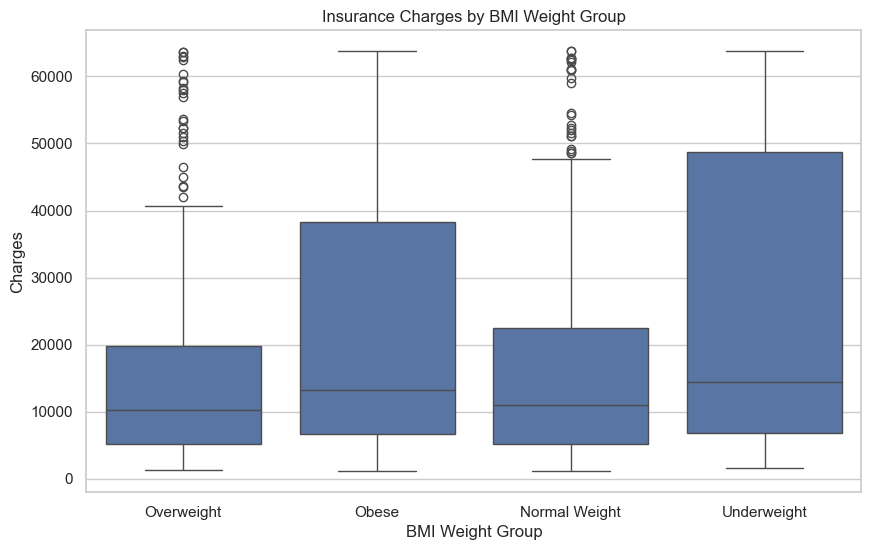

In [44]:
# Boxplot of Charges by BMI Weight Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi_weight_label', y='charges', data=df_i)
plt.title('Insurance Charges by BMI Weight Group')
plt.xlabel('BMI Weight Group')
plt.ylabel('Charges')
plt.show()

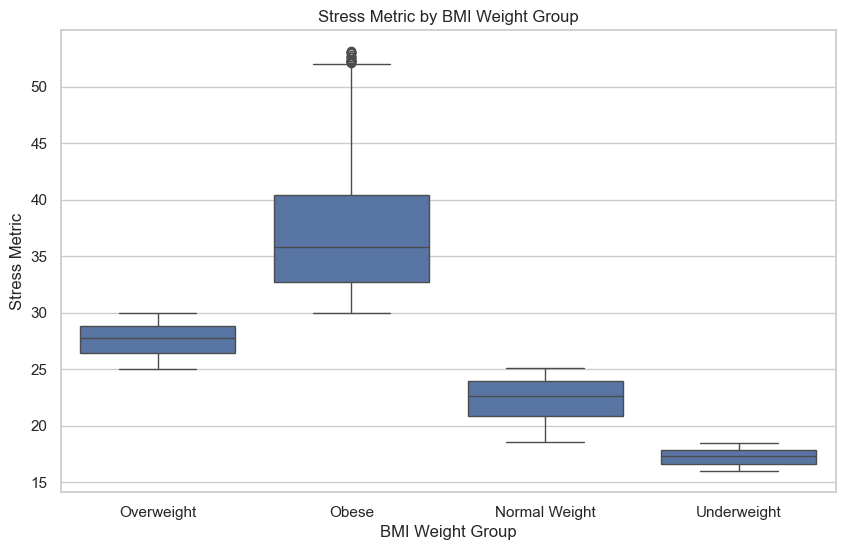

In [45]:
# Boxplot of Stress Metric by BMI weight group
plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi_weight_label', y='stress', data=df_i)
plt.title('Stress Metric by BMI Weight Group')
plt.xlabel('BMI Weight Group')
plt.ylabel('Stress Metric')
plt.show()

DISTRIBUTION PLOT

The distribution plot is used to visually assess the distribution and skewness of numerical variables in the DataFrame. This is especially useful for identifying data characteristics such as symmetry, peaks, tails, and skewness in the numerical columns.

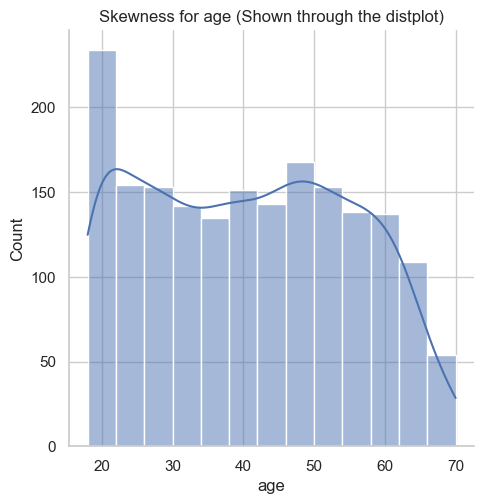

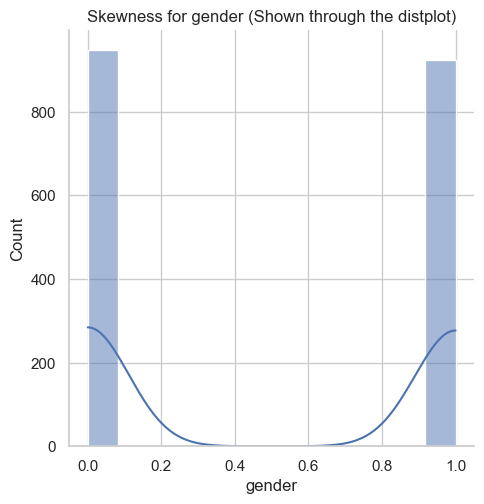

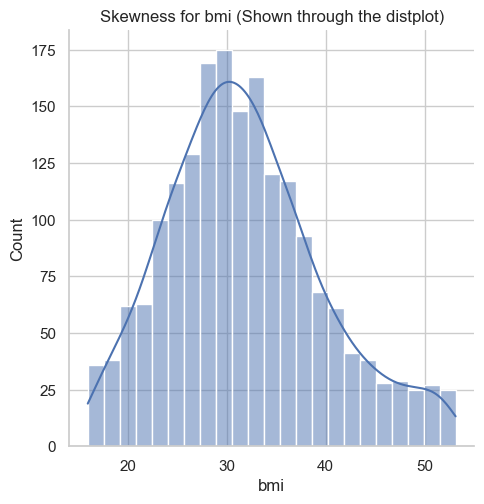

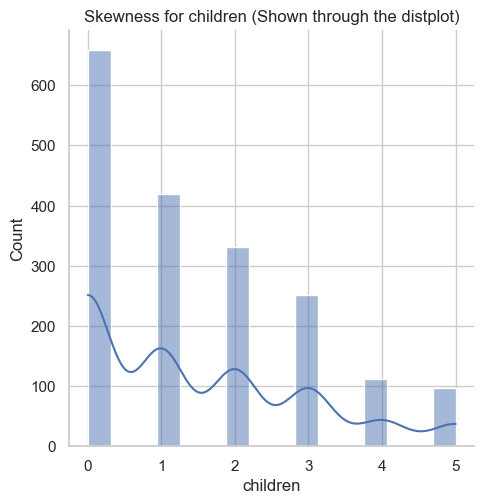

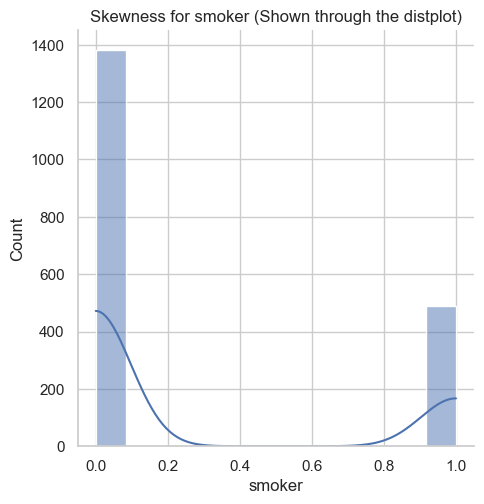

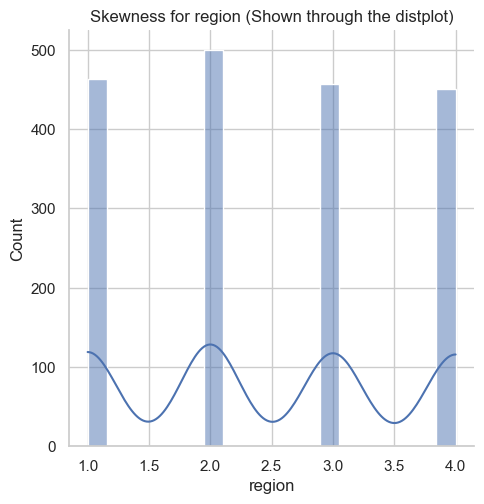

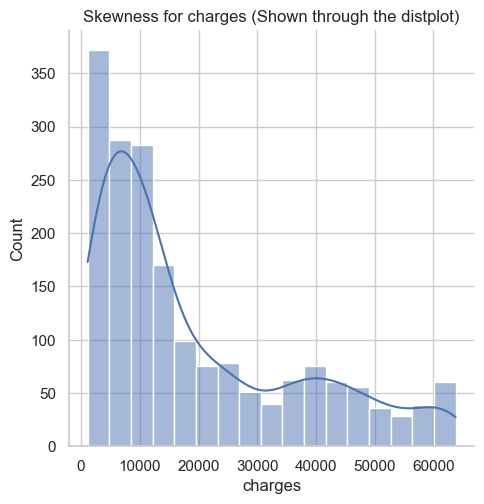

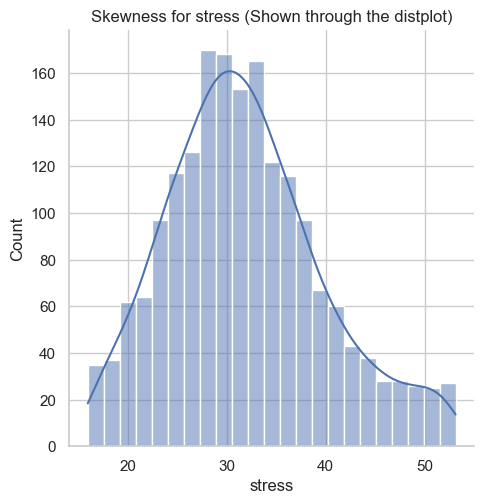

In [46]:
# Iterate through numerical columns in the DataFrame
for col in df_i.columns:
    if df_i[col].dtype != 'object':  # Consider only numerical columns
         # Create a distribution plot with KDE to visualize data distribution and skewness
        sns.displot(df_i[col], kde=True)
        plt.title(f'Skewness for {col} (Shown through the distplot)')
        plt.show()

In [47]:
# # Convert 'adult_group' to categorical
# df_i['adult_group'] = df_i['adult_group'].astype('category')
# df_i['adult_group'] = df_i['adult_group'].cat.codes

# # Create subsets of the data based on the conditions
# # change 33942.43 to mean
# non_smoker_lc = df_i[(df_i['smoker'] == 0) & (df_i['charges'] < 33942.43)]
# smoker_hc = df_i[(df_i['smoker'] == 1) & (df_i['charges'] > 33942.43)]

# # Plotting the subsets
# plt.figure(figsize=(10, 6))
# plt.scatter(non_smoker_lc['age'], non_smoker_lc['charges'], c=non_smoker_lc['adult_group'], marker='o', label='Non-Smokers', cmap='viridis')
# plt.scatter(smoker_hc['age'], smoker_hc['charges'], c=smoker_hc['adult_group'], marker='^', label='Smokers', cmap='viridis')
# plt.axhline(y=33942.43, color='r', linestyle='--', label='Charges Threshold')
# plt.xlabel('Age')
# plt.ylabel('Charges')
# plt.title('Scatter Plot of Charges vs Age')
# plt.legend()
# plt.colorbar()
# plt.show()

This code categorizes 'adult_group' for modeling and analyzes the distribution of charges among smokers and non-smokers, helping to assess how they differ in terms of insurance premium charges.

In [48]:
# Convert the 'adult_group' column to a categorical data type
df_i['adult_group'] = df_i['adult_group'].astype('category')
# Convert the 'adult_group' column to numerical codes for predictive modeling
df_i['adult_group'] = df_i['adult_group'].cat.codes

# Calculate the mean value for charges
m_val = df_i['charges'].mean() 
# Separate data into different groups based on smoking status and charges
non_smoker_lc = df_i[(df_i['smoker'] == 0) & (df_i['charges'] < m_val)]
non_smoker_hc = df_i[(df_i['smoker'] == 0) & (df_i['charges'] > m_val)]
smoker_lc = df_i[(df_i['smoker'] == 1) & (df_i['charges'] < m_val)]
smoker_hc = df_i[(df_i['smoker'] == 1) & (df_i['charges'] > m_val)]

# Calculate the length of each group to get the count
len_non_smoker_lc = len(non_smoker_lc)
len_non_smoker_hc = len(non_smoker_hc)
len_smoker_lc = len(smoker_lc)
len_smoker_hc = len(smoker_hc)

# Calculate the difference between related values of smokers and non-smokers
diff_non = len_non_smoker_lc - len_non_smoker_hc
diff_smoker = len_smoker_lc - len_smoker_hc

# Print the results
print("Length of non-smoker with low charges:", len_non_smoker_lc)
print("Length of non-smoker with high charges:", len_non_smoker_hc)
print("Difference between non-smoker with low charges and non smoker high charges:", diff_non)

print("Length of smoker with low charges:", len_smoker_lc)
print("Length of smoker with high charges:", len_smoker_hc)
print("Difference between smoker with low charges and smoker with high charges:", diff_smoker)


Length of non-smoker with low charges: 1106
Length of non-smoker with high charges: 276
Difference between non-smoker with low charges and non smoker high charges: 830
Length of smoker with low charges: 97
Length of smoker with high charges: 392
Difference between smoker with low charges and smoker with high charges: -295


This code creates a stacked bar plot to visually compare insurance premium charges between smokers and non-smokers for both low and high charge categories, enabling a clear visualization of the differences in charge distributions.

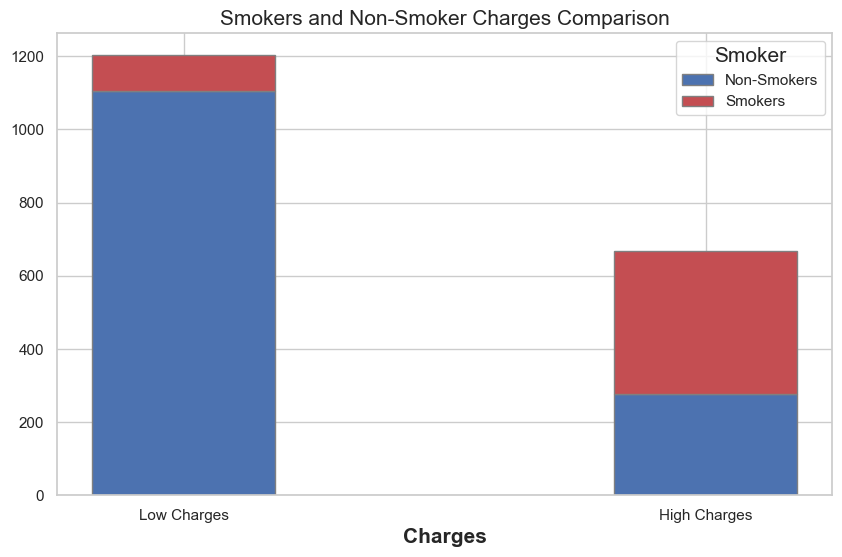

In [49]:
# Create lists to store counts of non-smokers and smokers for low and high charges
non_smokers = [len_non_smoker_lc, len_non_smoker_hc]
smokers = [len_smoker_lc, len_smoker_hc]

# Create a bar plot to compare charges for smokers and non-smokers
plt.figure(figsize=(10, 6))
barWidth = 0.35
r1 = [0,1]

# Plot bars for non-smokers and smokers, stacked to compare charges
plt.bar(r1, non_smokers, color='b', width=barWidth, edgecolor='grey', label='Non-Smokers')
plt.bar(r1, smokers, color='r', width=barWidth, edgecolor='grey', label='Smokers', bottom=non_smokers)

# Set plot labels and titles
plt.xlabel('Charges', fontweight='bold', fontsize=15)
plt.xticks([0, 1], ['Low Charges', 'High Charges'])
plt.title('Smokers and Non-Smoker Charges Comparison', fontsize=15)
plt.legend()
plt.xticks(r1, ['Low Charges', 'High Charges'])
plt.legend(loc='upper right')
plt.legend(title='Smoker', title_fontsize='15')
# Display the bar plot
plt.show()

Correlation Matrix

In [50]:
# df_i.corr()

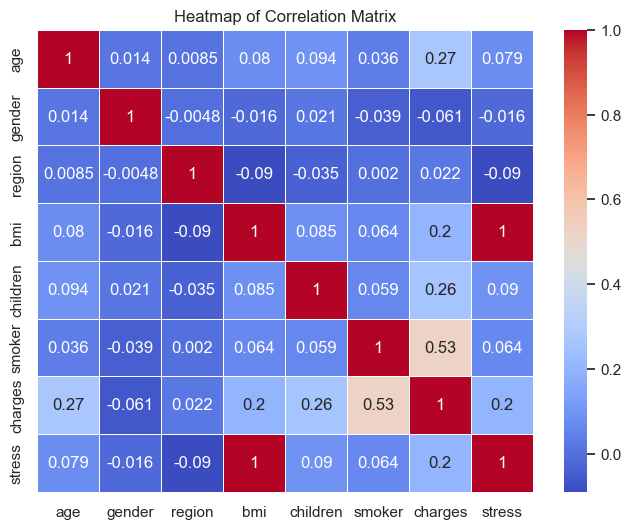

In [51]:
# Compute the correlation matrix
corr_matrix = df_i[['age', 'gender', 'region', 'bmi', 'children', 'smoker', 'charges', 'stress']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

The outcome is a heatmap that graphically displays the direction and intensity of correlations between the dataset's chosen columns. Warm colors indicate positive correlations, whereas cool colors indicate negative correlations. The correlation's strength is indicated by the color's intensity. The precise correlation coefficient values for each pair of columns are provided in the annotations. You may better grasp the relationships between the many variables in your dataset with the aid of this graphic.

Violin Plot

The resulting violin plot shows the distribution of BMI values for two categories of individuals: "Smoker" and "Non-Smoker." Each violin plot represents the distribution of BMI within each category. The width of the "violin" shape at each category represents the density of data points, with wider sections indicating higher density. The plot provides insights into the distribution and spread of BMI values for smokers and non-smokers, making it easier to compare the two groups and identify any differences in their BMI distributions.

A violin plot to visualize the distribution of insurance charges (or "charges") for different numbers of children ("children") while also considering the effect of smoking status ("smoker"):

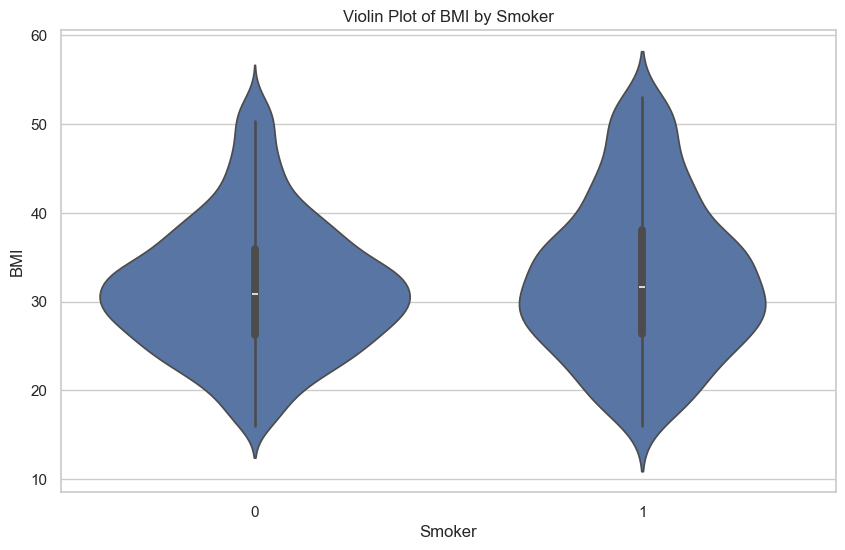

In [52]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='smoker', y='bmi', data=df_i)
plt.xlabel('Smoker')
plt.ylabel('BMI')
plt.title('Violin Plot of BMI by Smoker')
plt.show()

The resulting plot shows a series of violin plots, one for each number of children (e.g., 0 children, 1 child, 2 children, etc.). Within each violin, there are two halves representing "smokers" and "non-smokers." The width of the violin at each number of children represents the density of data points for insurance charges, with wider sections indicating higher density:

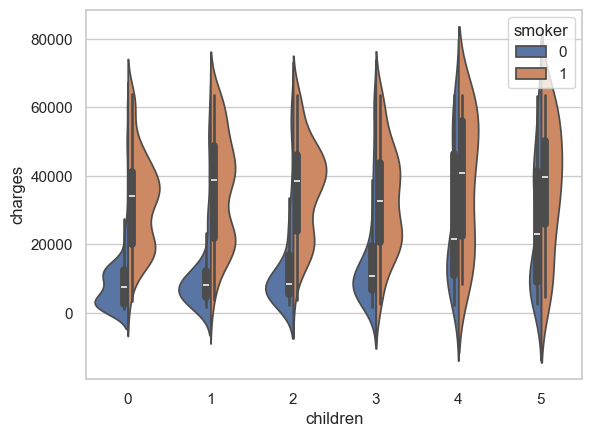

In [53]:
sns.violinplot(x='children', y='charges', hue='smoker', data=df_i, split=True)
plt.show()

Charges by BMI Weight Groups:
This code generates a violin plot depicting the distribution of insurance charges across different BMI weight groups.
The violin plot provides a comprehensive view of the charges' distribution, showcasing the density of values at different charge levels within each BMI weight group.

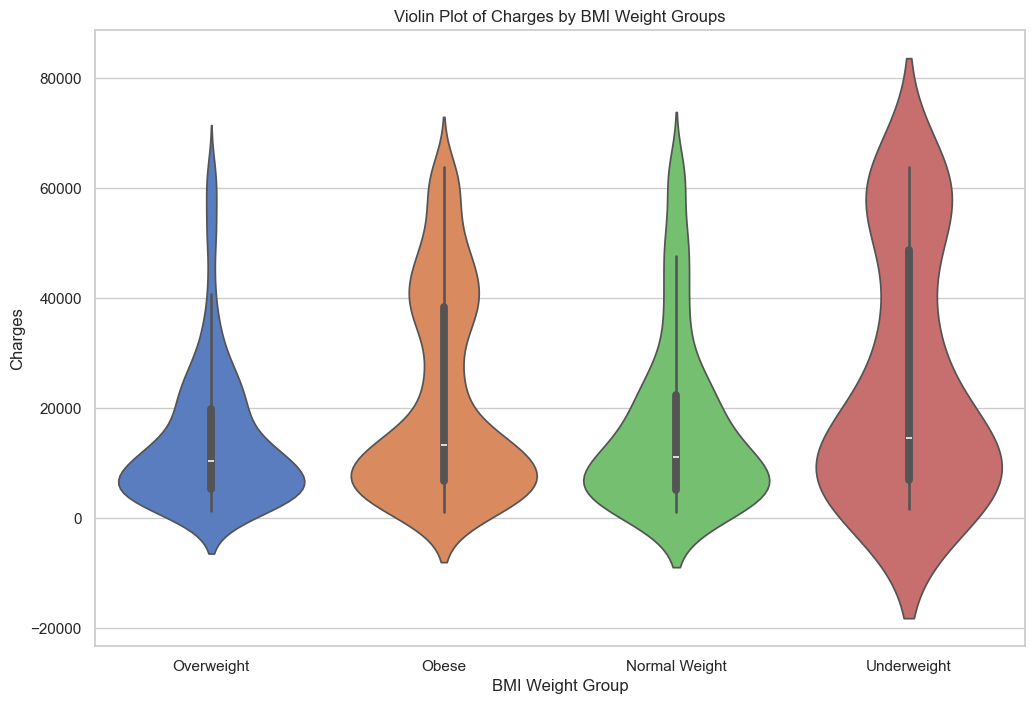

In [54]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='bmi_weight_label', y='charges', data=df_i, palette='muted')
plt.title('Violin Plot of Charges by BMI Weight Groups')
plt.xlabel('BMI Weight Group')
plt.ylabel('Charges')
plt.show()

COUNT PLOT

The count plot is to visually compare the distribution of smokers and non-smokers within distinct age groups(young,middle-aged and old), enabling an easy understanding of the prevalence of smoking across different age categories.

<Figure size 1000x600 with 0 Axes>

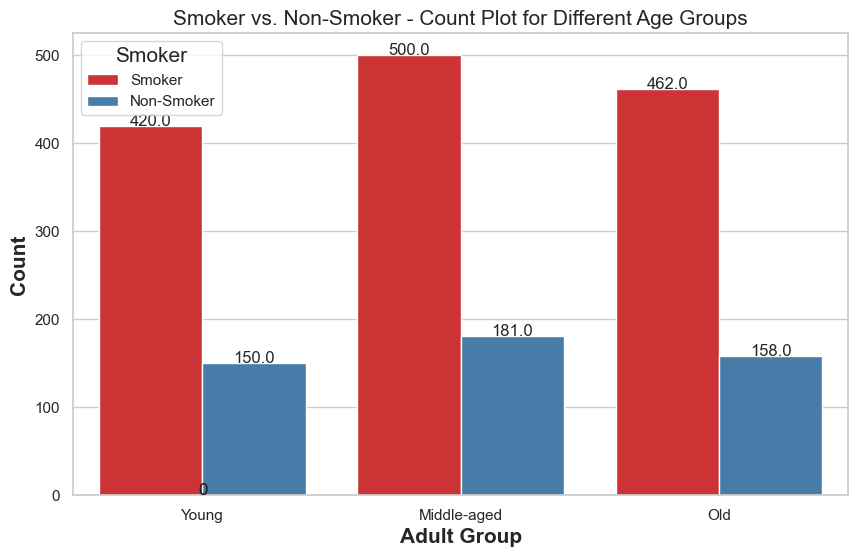

In [55]:
# Create a count plot to visualize the distribution of smokers and non-smokers within different age groups
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.countplot(data=df_i, x='adult_group', hue='smoker', palette="Set1")

# Customize x-labels based on age group
plt.xticks([0, 1, 2], ['Young', 'Middle-aged', 'Old'])
# Set plot labels and title
plt.xlabel('Adult Group', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.title('Smoker vs. Non-Smoker - Count Plot for Different Age Groups', fontsize=15)
plt.legend(title='Smoker', title_fontsize='15', labels=['Smoker', 'Non-Smoker'])
# Annotate the bars with the count of observations
for a in ax.patches:
    ax.annotate(f'{a.get_height()}', (a.get_x() + a.get_width() / 2., a.get_height()), ha='center', va='baseline')
# Display the count plot
plt.show()

BMI Weight Groups by Smoker Status:
This code generates a count plot illustrating the distribution of individuals across BMI weight groups based on their smoker status.
The plot provides a visual comparison of how individuals in different BMI weight categories are distributed among smokers and non-smokers. It helps in understanding the relationship between BMI weight groups and smoker status.

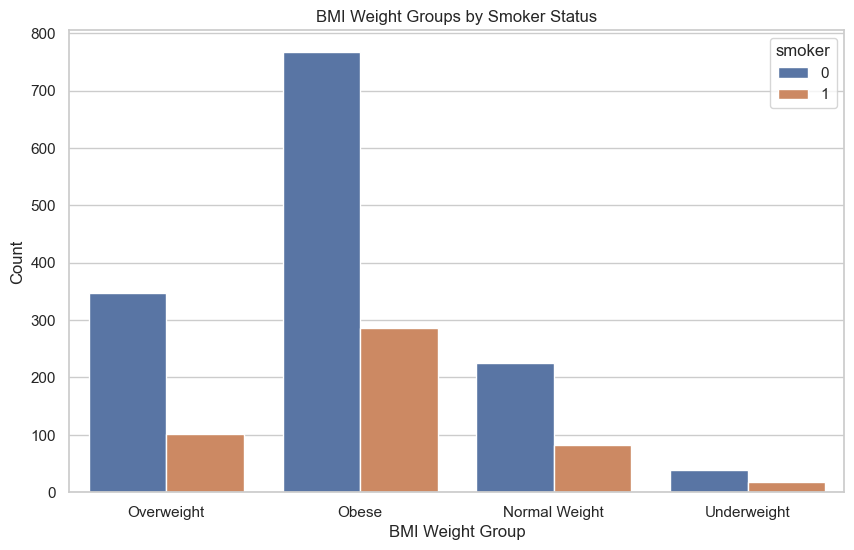

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bmi_weight_label', hue='smoker', data=df_i)
plt.title('BMI Weight Groups by Smoker Status')
plt.xlabel('BMI Weight Group')
plt.ylabel('Count')
plt.show()


# Clustering

In [57]:
df_i.head()
# Display the first 5 rows of our dataset 

age  gender    bmi  children  smoker  region   charges  adult_group  \
0   19       1  27.90         0       1       1  16884.92            2   
1   18       0  33.77         1       0       2   1725.55            2   
2   28       0  33.00         3       0       2   4449.46            2   
3   33       0  22.70         0       0       3  21984.47            0   
4   32       0  28.88         0       0       3   3866.86            0   

  bmi_weight_label charge_average     stress  
0       Overweight      Below Avg  27.900000  
1            Obese      Below Avg  33.825556  
2            Obese      Below Avg  33.107143  
3    Normal Weight      Below Avg  22.700000  
4       Overweight      Below Avg  28.880000

In [58]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [59]:
#These are the imports which we need for clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Elbow Method

In [60]:
# Select features for clustering
features = ['age', 'bmi', 'children', 'smoker', 'charges']

# Standardize the data
scale = StandardScaler()
scaled_data = scale.fit_transform(df_i[features])

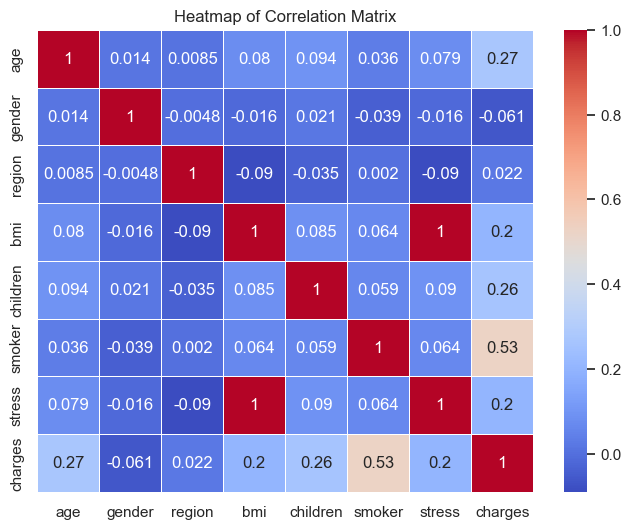

In [61]:
# Compute the correlation matrix
corr_matrix = df_i[['age', 'gender','region', 'bmi', 'children', 'smoker', 'stress', 'charges']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

From the above Correlation Analysis, we can decide which features to include in our Clustering Analysis. Feature Selection based on the Correlation Analysis is one of the methods. We can observe that Charges is our target feature, hence we wont be including it in the Clustering Analysis. 
    
The features chosen for Clustering (age, BMI, number of Children, and smoking habit) are chosen due to their relevance and impact on the person's health, and then to the insurance charge as well. These have been recognized as the factors which influence the individual's health status.

These features have higher correlation with the charges feature. But that's not the only reason why it has been chosen specifically, (Age and Charges:0.27, BMI and Charges:0.20, Children and Charges: 0.26, Smoker and Charges: 0.53) but also because they are significant determinants in the domain of Health Insurance. Age often correlates with increased health concerns, BMI reflects potential health risks associated with body weight, larger family sizes might lead to increased healthcare needs, smoking habit is a well-established health risk, and thus impacting insurance charges.

In [62]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [63]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

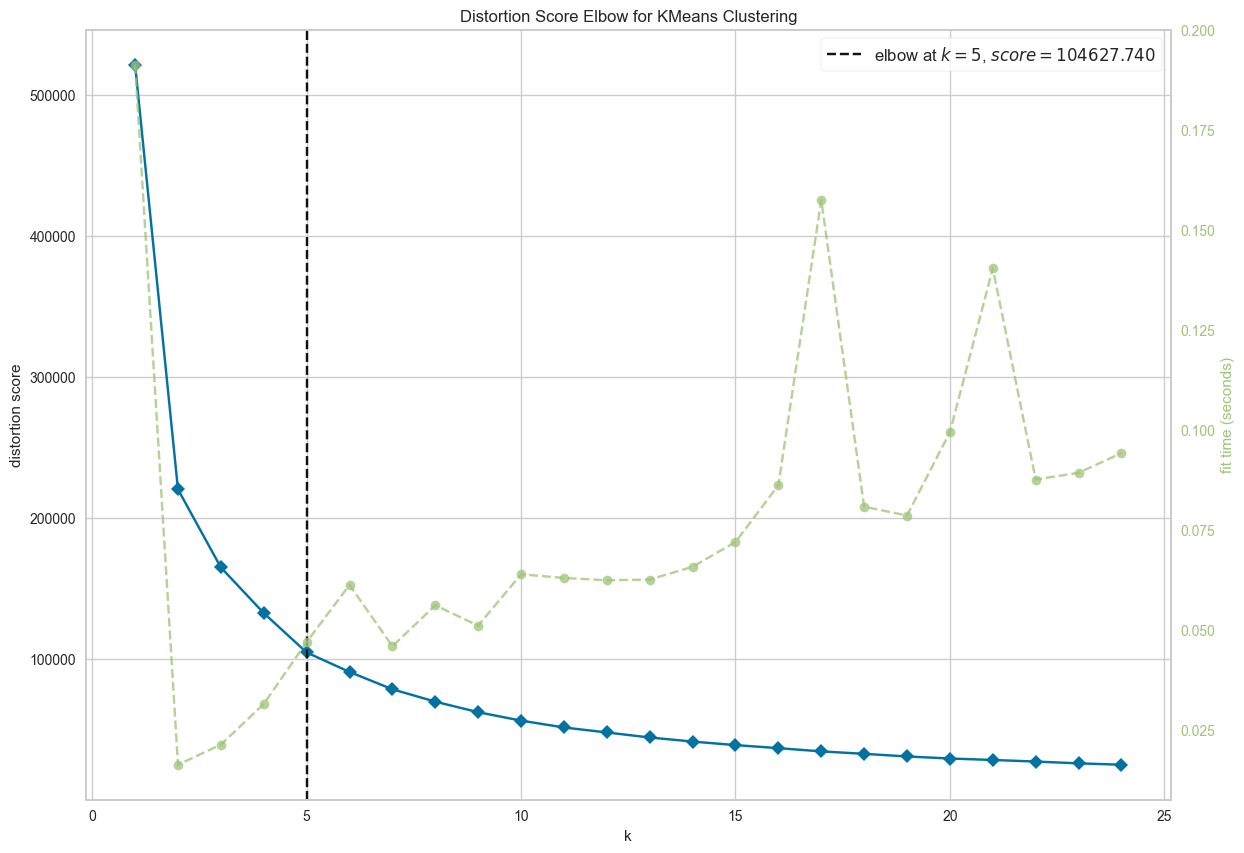

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:

fig = plt.figure(figsize=(14, 10))
X = df_i[['age', 'bmi', 'children', 'smoker']]
model = KMeans(random_state=22)
# Using : KElbowVisualizer
v_clusters = KElbowVisualizer(model, k=(1, 25))
v_clusters.fit(X)
v_clusters.show()

# CLUSTERING

 - Clustering is an unsupervised learning technique designed to identify inherent patterns within data based on specified features without considering the target variable directly.
 - In simple terms, it groups the data points together based on their similarities.
 - Hence, using this we can identify patterns and inherent patterns in the data, which aids in the categorization of data into groups.
 - As it is an Unsupervised Learning Algorithm, it can identify patterns even without being provided with labels.
 - One of the main challenges while performing Clustering is to choose the number of clusters, which we overcame using the Elbow Method(Demonstrated Above).
 - While performing Clustering, we deliberately exclude the target feature, because it is the very element the clustering aims to predict or analyze.
 - Here we have performed a few Clustering Analysis Algorithms, through which we have gained a few insights. We performed:
    - K - Means Clustering
    - Hierarchial Clustering
    - Agglomerative Clustering
    - DBSCAN Clustering
    - K - Modes Clustering 

### K-Means Clustering

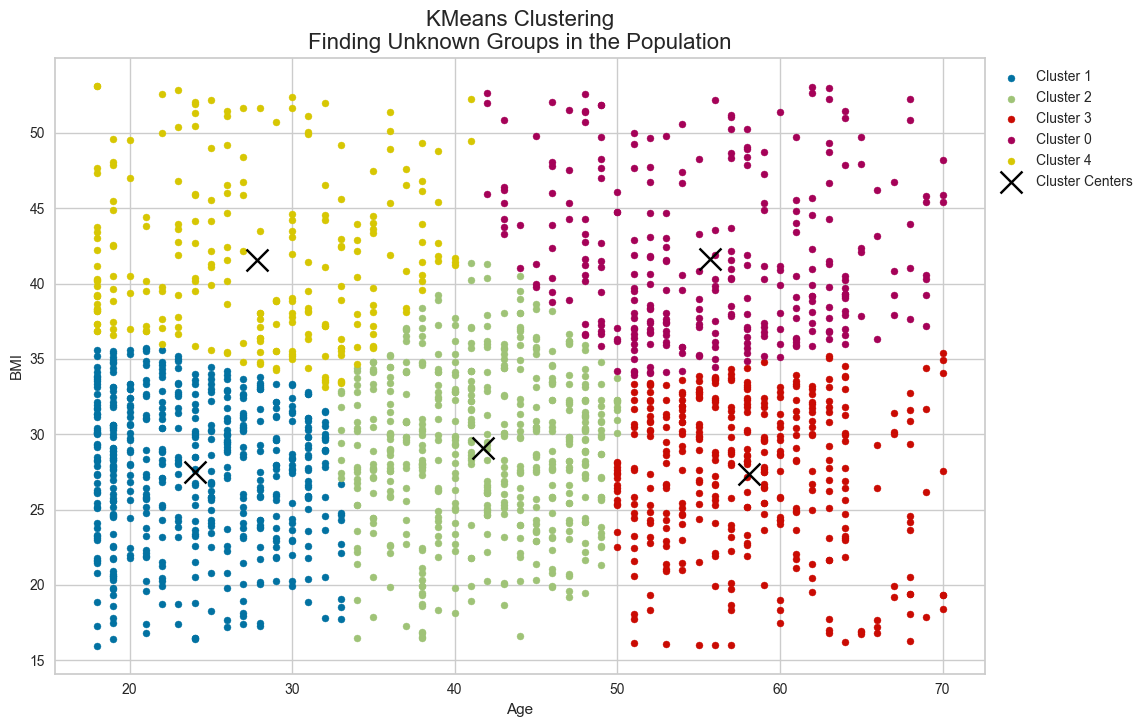

In [65]:
kmeans = KMeans(n_clusters=5, random_state=22)
df_i['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(12, 8))
for cluster_label in df_i['cluster'].unique():
    cluster_data = df_i[df_i['cluster'] == cluster_label]
    plt.scatter(cluster_data['age'], cluster_data['bmi'], label=f'Cluster {cluster_label}', s=25)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker="x", s=250, label='Cluster Centers')
plt.title("KMeans Clustering\nFinding Unknown Groups in the Population", fontsize=16)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True)

plt.show()

Here we've demonstrated K-Means Clustering, a popular unsupervised machine learning algorithm used for partitioning a dataset into a predefined number of clusters. This Algorithm divides data points based on their 'age' and 'BMI' features into distinct clusters and represents these clusters in a scatter plot.
    
First we create an instance of the K-Means algorithm (kmeans) and then initialize it using the parametereters such as n_clusters (here we have given it as '5' based on the Elbow method we've applied above, indicating that it will create 5 clusters)and random_state (Here we've set it as '22' for reproducibility).

Now, we create a new column in the data frame('df_i') i.e., 'cluster' which stores the cluster labels generated by the KMeans Algorithm. Then we apply the 'fit_predict' method to the feature set 'X' to assign each data point to a particular cluster based on the 'age' and 'BMI' features.
    
Now, we generate a scatter plot to visualize the clusters using a loop, which iterates through each unique cluster label in the 'cluster' column which we've created above and plots the data as data points. The 'X' markers in the black represent the Cluster centres which are determined by the KMeans algorithm. They are mean values of 'age' and 'BMI' for each cluster.
    
Using 'plt.show()', we display the scatter plot.

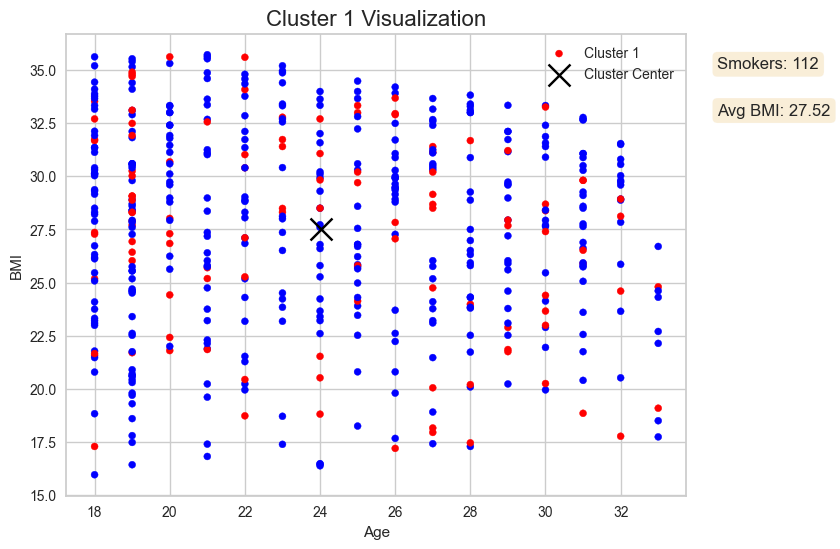

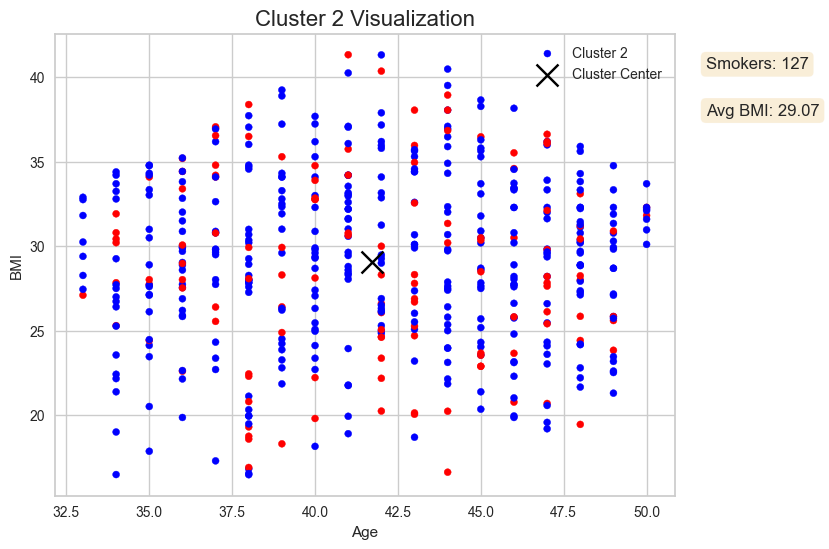

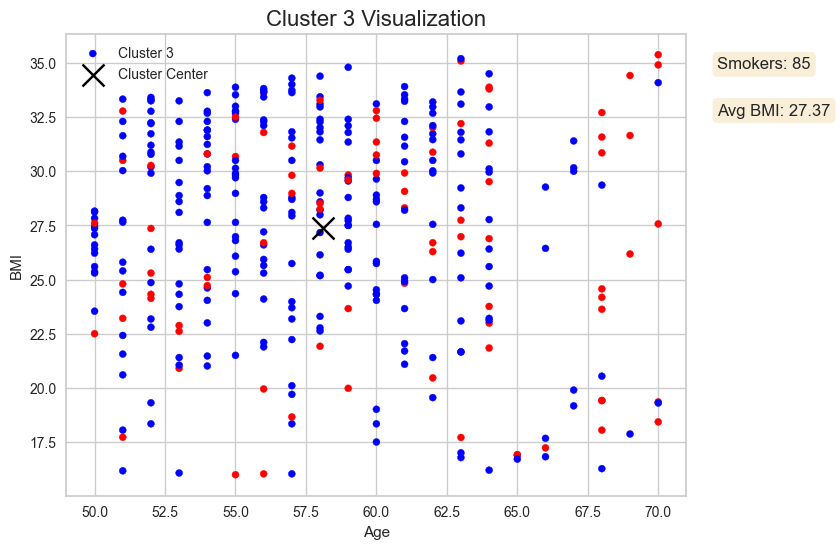

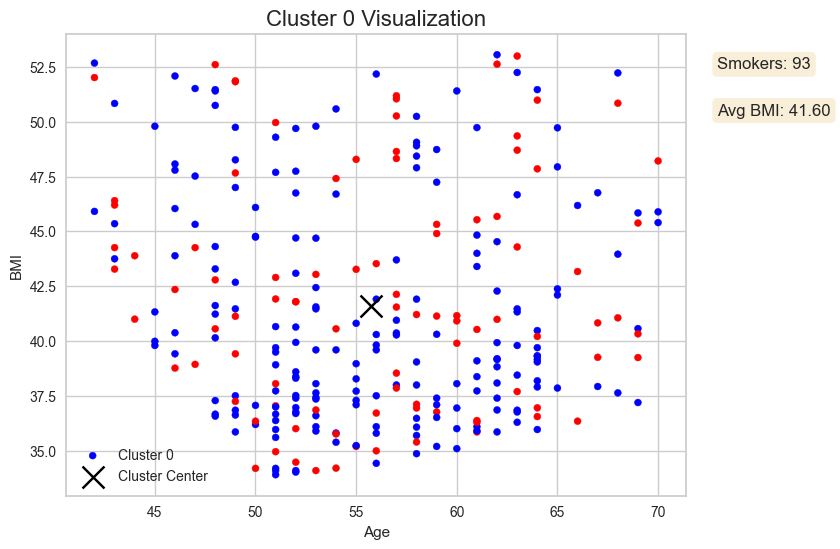

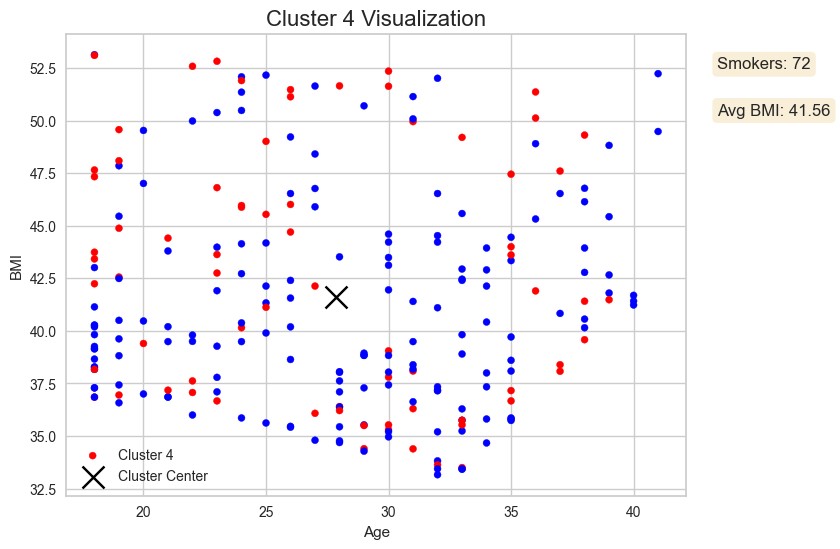

In [66]:
for cluster_label in df_i['cluster'].unique():
    fig, ax = plt.subplots(figsize=(8, 6))
    cluster_data = df_i[df_i['cluster'] == cluster_label]
    smoker_colors = cluster_data['smoker'].map({0: 'blue', 1: 'red'})
    ax.scatter(cluster_data['age'], cluster_data['bmi'], c=smoker_colors, label=f'Cluster {cluster_label}', s=25)
    ax.scatter(kmeans.cluster_centers_[cluster_label, 0], kmeans.cluster_centers_[cluster_label, 1], color='black', marker="x", s=250, label='Cluster Center')

    # Adding annotations for count of smokers and average BMI outside the plot
    count_smokers = cluster_data['smoker'].sum()
    avg_bmi = cluster_data['bmi'].mean()
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(1.05, 0.95, f'Smokers: {count_smokers}', transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
    ax.text(1.05, 0.85, f'Avg BMI: {avg_bmi:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)

    ax.set_title(f"Cluster {cluster_label} Visualization", fontsize=16)
    ax.set_xlabel('Age')
    ax.set_ylabel('BMI')
    ax.legend()
    plt.show()

Here, we are creating a few subplots, each displaying individual cluster. Using this we can explore and visualize clusters distinguishing between smokers and non-smokers within each cluster. 
    
Using a loop, we iterate through the each cluster label in the cluster column of the data frame. The variable 'cluster_data' isolates the data corresponding to specific cluster. 

We differentiate between smokers and non-smokers by visualizing them with different colours in each subplot i.e., we use 'Blue' for 'Non-Smokers and 'Red' for 'Smokers'. Hence, as a result, data points of 'age' and 'BMI' are plotted with seperate colours for smokers and non-smokers. 

Similarly as above, we use a 'X' black mark to represent the centroid of the cluster. 

We then label the subplots with their respective cluster labels to avoid confusion between clusters. We even included some additional information for each cluster such as count of smokers in each cluster and mean BMI of each cluster. 

As a whole, these subplots of clusters helped in understanding the structure of data, identifying patterns within different groups and exploring how features combine to form distinct clusters.

### Hierarchial Clustering

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

In [68]:
numerical_df_i = df_i[['age', 'bmi', 'children', 'smoker', 'charges']]


In [69]:
Z1 = linkage(numerical_df_i, method='single', metric='euclidean')
Z2 = linkage(numerical_df_i, method='complete', metric='euclidean')
Z3 = linkage(numerical_df_i, method='average', metric='euclidean')
Z4 = linkage(numerical_df_i, method='ward', metric='euclidean')

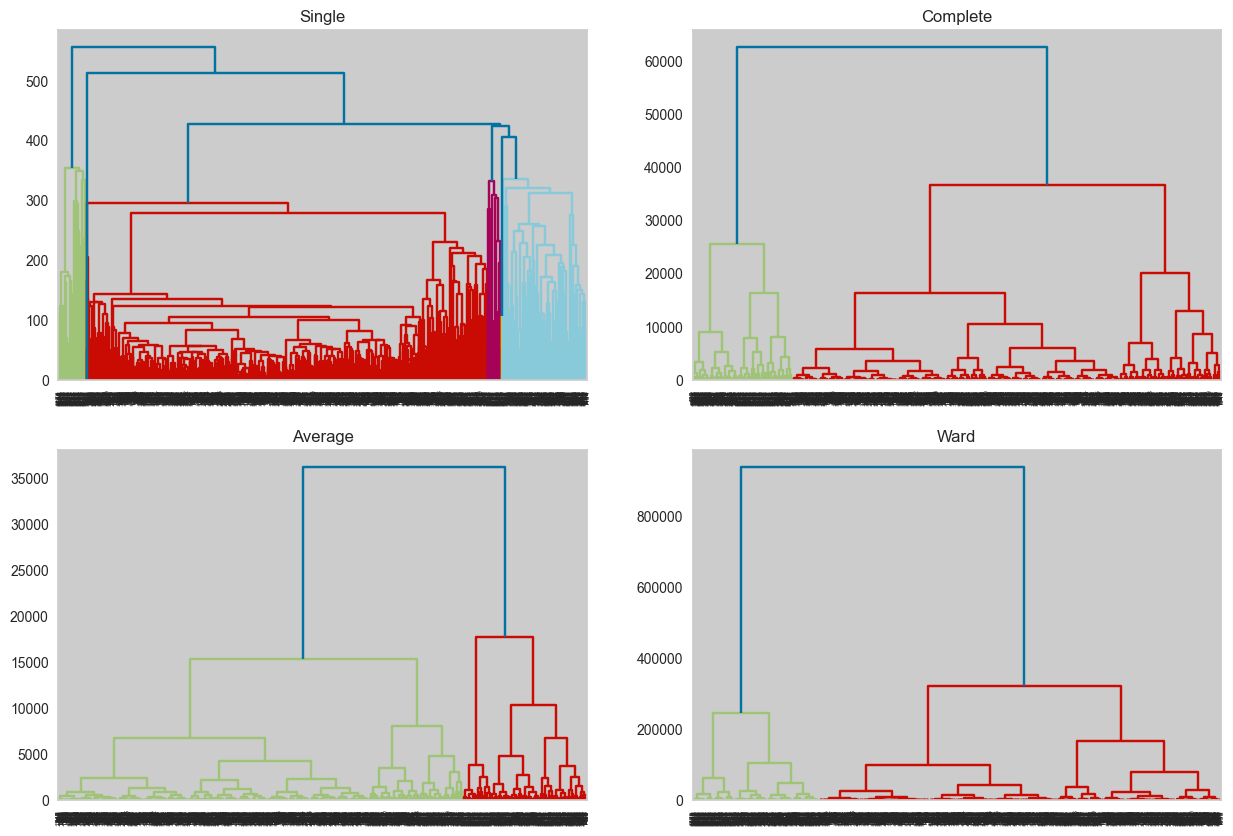

In [70]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()

In [71]:
from scipy.cluster.hierarchy import fcluster

numerical_df_i['h_clusters'] = fcluster(Z4, 2, criterion='maxclust')
print(f"Clusters: {numerical_df_i['h_clusters'].unique()}")


Clusters: [2 1]


In [72]:
numerical_df_i.head()
# df_i.head()

age    bmi  children  smoker   charges  h_clusters
0   19  27.90         0       1  16884.92           2
1   18  33.77         1       0   1725.55           2
2   28  33.00         3       0   4449.46           2
3   33  22.70         0       0  21984.47           2
4   32  28.88         0       0   3866.86           2

In [73]:
labelList = list(df_i['bmi_weight_label'])
# Perform hierarchical clustering using Ward's method
linked = shc.linkage(scaled_data, method='ward', metric='euclidean')
df_i['h_clusters'] = fcluster(linked, 2, criterion='maxclust')
print("Unique values of herirachical clusters ",np.unique(df_i['h_clusters']))

Unique values of herirachical clusters  [1 2]


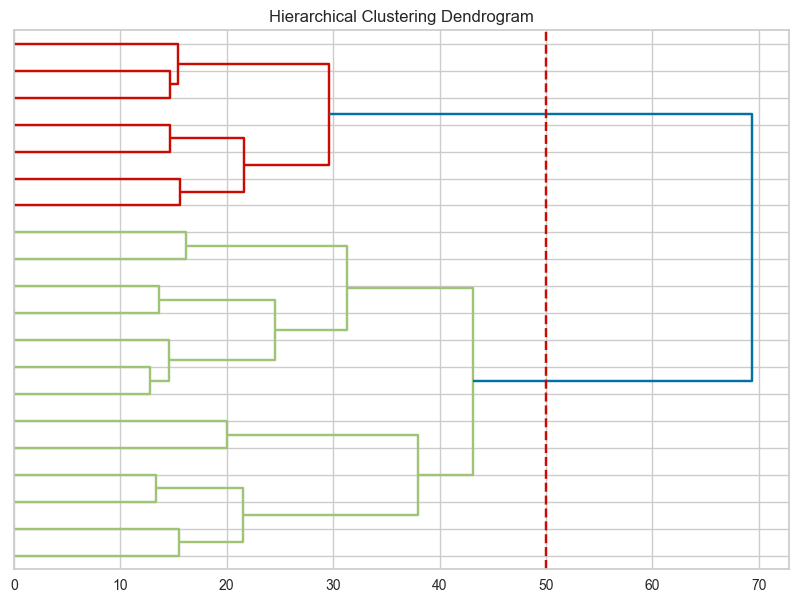

In [74]:

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(linked,
               orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=12,
    truncate_mode='lastp',  # Set the truncate mode
    p=20)

plt.axvline(x=50, color='r', linestyle='--')

plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Agglomerative

We are analyzing our dataset using the Agglomerative Clustering algorithm in this snippet of code. Every data point is first treated as a separate cluster by this hierarchical clustering method, which then gradually combines the closest pairs until only one cluster is left.

Using the sklearn.cluster module's AgglomerativeClustering function, we've specified 5 clusters with n_clusters=5. By reducing their variance throughout the merging process, the 'ward' method from scipy.cluster.hierarchy is selected to compute the distance between clusters.

We have created a scatter plot to provide the clusters a visual representation. We can visually see how the algorithm has grouped data points based on the features "age," "bmi," "children," and "smoker." Each cluster is represented by a different color.

To further show the hierarchical links between clusters, a dendrogram is constructed. Every vertical line in the dendrogram represents a cluster, and the height shows how far apart merging clusters are from one another. Greater dissimilarity throughout the merging process is shown by longer lines.

In summary, this code creates visualizations that make it easier to explore patterns and relationships in the data by doing Agglomerative Clustering on our dataset. It is a powerful tool that helps us understand the underlying structure of our data.

In [1]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

numerical_df_i = df_i[['age', 'bmi', 'children', 'smoker']]

X=numerical_df_i

agglomerative_clustering = AgglomerativeClustering(n_clusters=5).fit(X)

linked = linkage(X, method='ward')

plt.style.use("Solarize_Light2")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

ax1.scatter(X.values[:, 0], X.values[:, 1], c=agglomerative_clustering.labels_, cmap="Set1_r", s=25)
ax1.set_title("Agglomerative Clustering", fontsize=16)

dendrogram(linked,
           orientation='top',
           labels=agglomerative_clustering.labels_,
           distance_sort='descending',
           show_leaf_counts=False,
           ax=ax2)

ax2.set_title("Dendrogram on Agglomerative Clustering")

plt.show()

NameError: name 'df_i' is not defined

In [76]:
print(np.unique(agglomerative_clustering.labels_))

[0 1 2 3 4]


In [77]:
df_i['a_clusters'] = agglomerative_clustering.labels_
df_i.head()

age  gender    bmi  children  smoker  region   charges  adult_group  \
0   19       1  27.90         0       1       1  16884.92            2   
1   18       0  33.77         1       0       2   1725.55            2   
2   28       0  33.00         3       0       2   4449.46            2   
3   33       0  22.70         0       0       3  21984.47            0   
4   32       0  28.88         0       0       3   3866.86            0   

  bmi_weight_label charge_average     stress  cluster  h_clusters  a_clusters  
0       Overweight      Below Avg  27.900000        1           1           0  
1            Obese      Below Avg  33.825556        1           2           1  
2            Obese      Below Avg  33.107143        1           2           0  
3    Normal Weight      Below Avg  22.700000        1           2           0  
4       Overweight      Below Avg  28.880000        1           2           0

### DBSCAN

DBSCAN WITH SCALED DATA

The DBSCAN (Density-Based Spatial Clustering of Applications with Noise) technique is being used in this code to analyze the dataset. The data points that are near to one another in the feature space and have a minimal number of points in their neighborhood are grouped together using this density-based clustering technique.

The clustering is being done with the help of the DBSCAN function from the sklearn.cluster module. The maximum distance between two samples for them to be regarded as being in the same neighborhood is 0.5, which is the value we have specified for the eps parameter. The amount of samples in a neighborhood required for a location to be deemed a core point is 2, and we have set this value to 2.

Scaled_data is clustered using the fit_predict method, which also predicts the cluster labels for individual data points. Next, we add the predicted labels to a new column called "cluster_dbscan" in our dataframe df_i.

To finally see the clusters, we are making a scatter plot. Plotting is done on two axes: the y-axis for charges and the x-axis for the "bmi" feature. Distinct colors are used to symbolize each cluster. We can better understand how the algorithm categorized the data points according to the "bmi" and "charges" attributes by looking at the scatter plot.

In [78]:
from sklearn.cluster import DBSCAN

In [79]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
df_i['cluster_dbscan'] = dbscan.fit_predict(scaled_data)

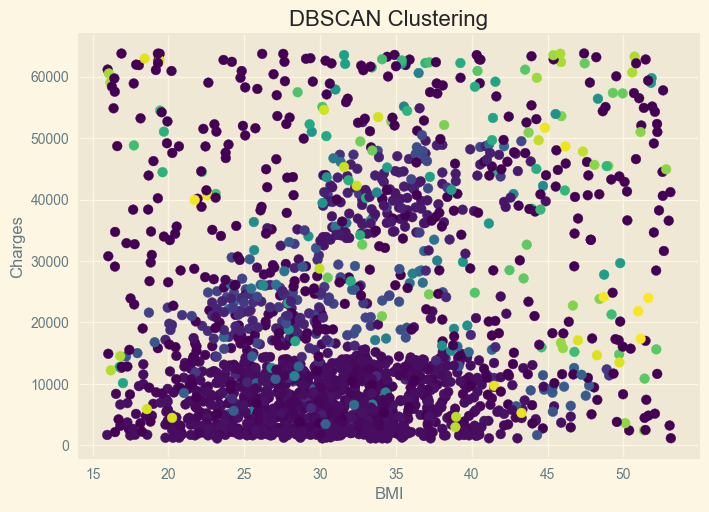

In [80]:
plt.scatter(df_i['bmi'], df_i['charges'], c=df_i['cluster_dbscan'], cmap='viridis')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('DBSCAN Clustering')

plt.show()

### K-Modes Clustering

In [81]:
pip install KModes

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [82]:
from kmodes.kmodes import KModes
# Convert categorical features to arrays
d_categorial = df_i[['gender', 'bmi', 'smoker', 'region']].values

In [83]:
df_i.head()

age  gender    bmi  children  smoker  region   charges  adult_group  \
0   19       1  27.90         0       1       1  16884.92            2   
1   18       0  33.77         1       0       2   1725.55            2   
2   28       0  33.00         3       0       2   4449.46            2   
3   33       0  22.70         0       0       3  21984.47            0   
4   32       0  28.88         0       0       3   3866.86            0   

  bmi_weight_label charge_average     stress  cluster  h_clusters  a_clusters  \
0       Overweight      Below Avg  27.900000        1           1           0   
1            Obese      Below Avg  33.825556        1           2           1   
2            Obese      Below Avg  33.107143        1           2           0   
3    Normal Weight      Below Avg  22.700000        1           2           0   
4       Overweight      Below Avg  28.880000        1           2           0   

   cluster_dbscan  
0               0  
1               1  
2               2  
3              -1  
4               3

In [84]:
# Perform K-Modes clustering
km = KModes(n_clusters=5, init='Huang', n_init=10, verbose=1)  # Adjusting n_init for more robust initialization
clusters = km.fit_predict(d_categorial)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 60, cost: 2951.0
Run 1, iteration: 2/100, moves: 0, cost: 2951.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 63, cost: 3214.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 619, cost: 3236.0
Run 3, iteration: 2/100, moves: 2, cost: 3236.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 10, cost: 3217.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 5, cost: 3257.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 858, cost: 3026.0
Run 6, iteration: 2/100, moves: 0, cost: 3026.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
R

Here, we are applying K-Modes algorithm. It is specifically designed for clustering categorical data. It is an extension of K-Means Algorithm, but works effectively with categorical data rather than numerical.  
    
First we create an instance of the algorithm 'km', and then assign the different parametereters such as 'n_clusters' which is 5 here, which means that we want 5 different clusters in this case, 'init' to 'Huang' which is a method for initializing cluster centroids, 'n_init' to 10 which indicates the number of times the algorithm must run and find the best clustering result and 'verbose' details for better visibility.  
  
And then we run the K-Modes algorithm using the '.fit_predict()' function on the array of the categorical dataset to determine the cluster for each point. It assigns each data point to one of the 5 clusters.

In [85]:
# Add cluster labels to the dataset
df_i['km_cluster'] = clusters

In [86]:
print(df_i['km_cluster'].unique())
#We are printing the unique cluster labels which have been formed by KModes Clutering Algorithm

[1 2 0 4 3]


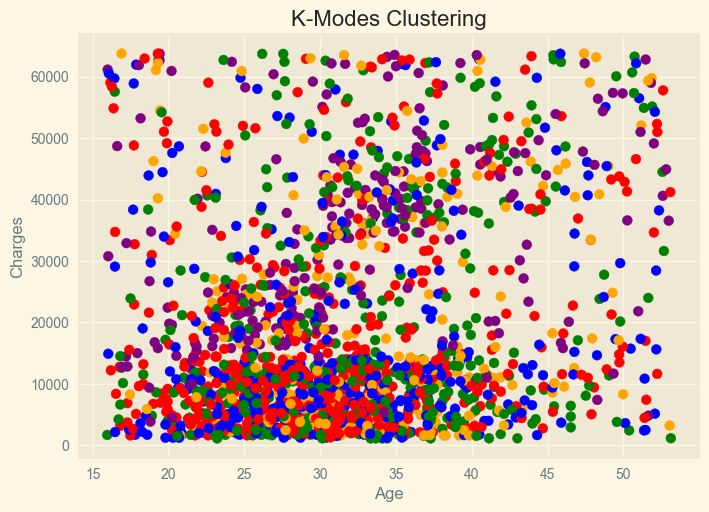

In [87]:
colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.scatter(df_i['bmi'], df_i['charges'], c=np.array(colors)[df_i['km_cluster']], s=50)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('K-Modes Clustering')
plt.show()

Here we create a scatter plot to visualize the clustering results obtained by the K-Modes Algorithm showing the relationship between 'BMI' and 'Charges'. We use different colours to differentiate the clusters. This representation helps in understanding any patterns or relationships among these features within different clusters.

In [88]:
for cluster in df_i['km_cluster'].unique():
    print(f"Cluster {cluster} Data Points:")
    print(df_i[df_i['km_cluster'] == cluster].sample(1))
    print('\n')

Cluster 1 Data Points:
      age  gender    bmi  children  smoker  region   charges  adult_group  \
1354   38       0  46.78         4       0       1  34464.56            0   

     bmi_weight_label charge_average     stress  cluster  h_clusters  \
1354            Obese      Above Avg  46.885263        4           2   

      a_clusters  cluster_dbscan  km_cluster  
1354           1              -1           1  


Cluster 2 Data Points:
     age  gender    bmi  children  smoker  region   charges  adult_group  \
639   56       0  33.66         4       0       2  12949.16            1   

    bmi_weight_label charge_average     stress  cluster  h_clusters  \
639            Obese      Below Avg  33.731429        3           2   

     a_clusters  cluster_dbscan  km_cluster  
639           2              12           2  


Cluster 0 Data Points:
      age  gender    bmi  children  smoker  region  charges  adult_group  \
1082   38       0  19.95         1       0       3   5855.9          

Here, we print a random sample data point from each unique cluster created by the K-Modes Algorithm. It iterates through each unique cluster label from data frame and prints a single random data point from each cluster.

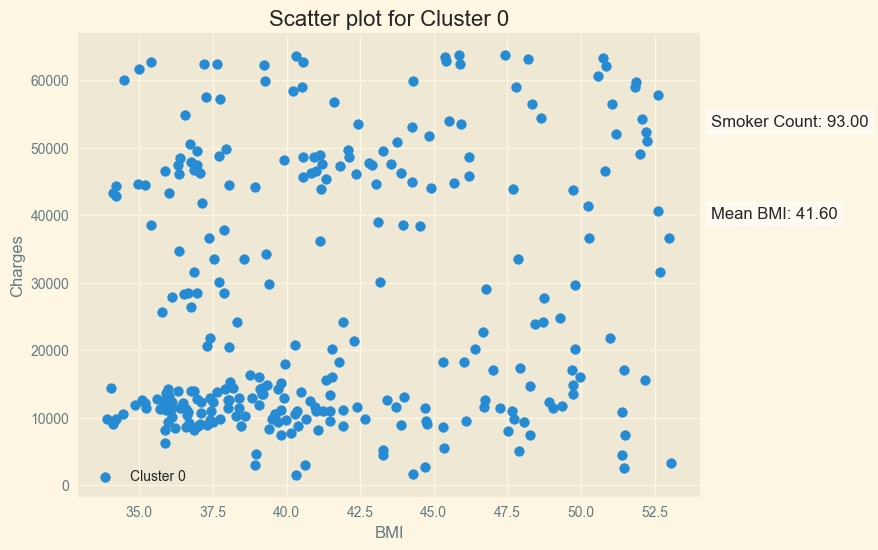

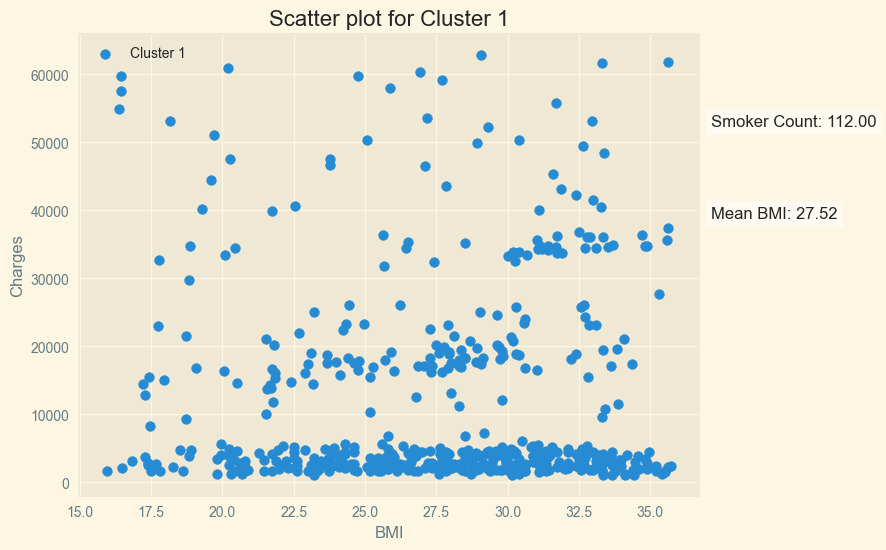

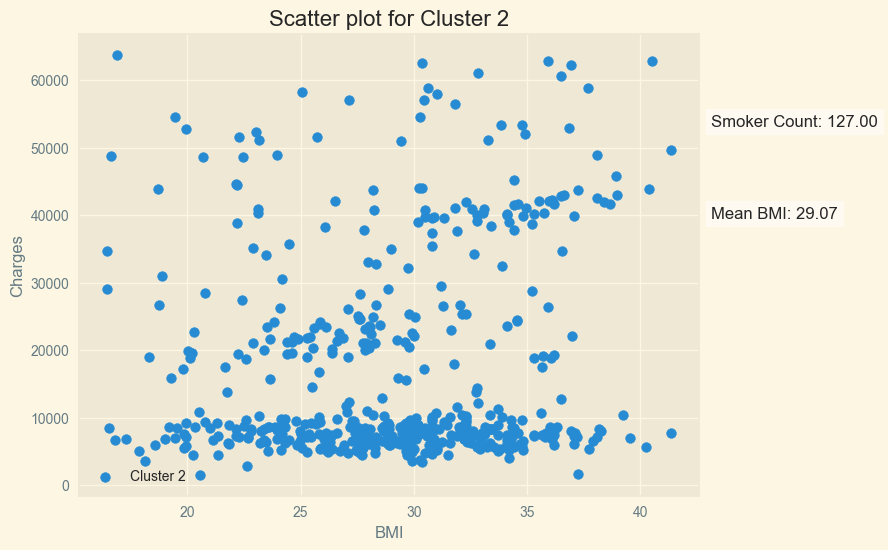

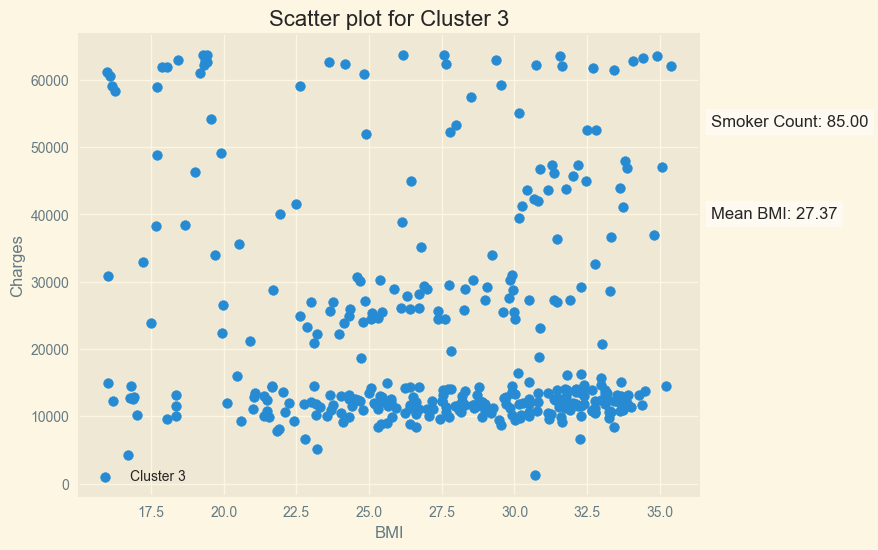

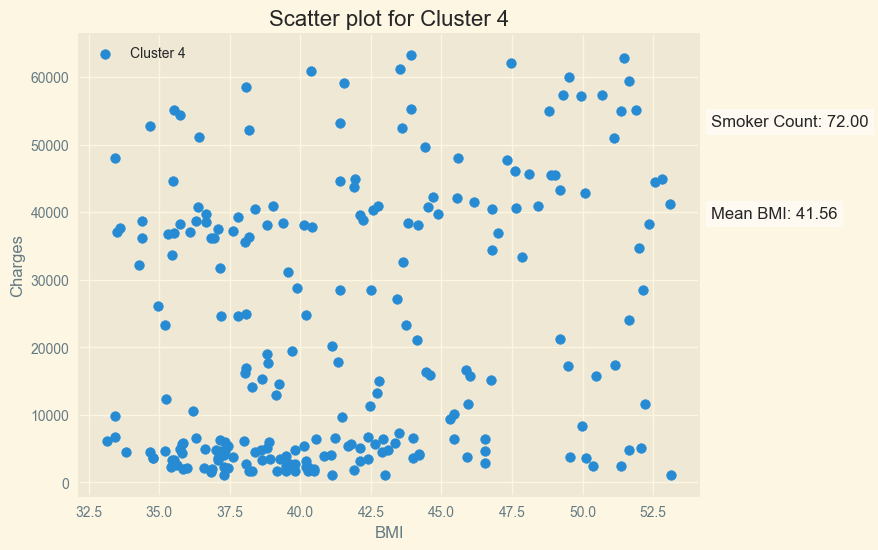

In [89]:
clusters = [0, 1, 2, 3, 4]  # Replace with your cluster values

for cluster in clusters:
    plt.figure(figsize=(8, 6))
    cluster_data = df_i[df_i['cluster'] == cluster]
    plt.scatter(cluster_data['bmi'], cluster_data['charges'], label=f'Cluster {cluster}', s=50)
    plt.xlabel('BMI')
    plt.ylabel('Charges')
    plt.title(f'Scatter plot for Cluster {cluster}')
    plt.legend()
    count_smoker = cluster_data['smoker'].sum()
    mean_bmi = cluster_data['bmi'].mean()

    plt.text(1.02, 0.8, f'Smoker Count: {count_smoker:.2f}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(1.02, 0.6, f'Mean BMI: {mean_bmi:.2f}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

Similar to the K-Means clustering, here also we are creating various small subplots of scatter plots for distinct clusters created. We iterate through each cluster and produce a scatter plot between 'BMI' and 'Charges'.   
    
Even here we are displaying additional information along with the plot such as 'Smokers Count' and 'Average BMI' of each and every cluster.   
  
Using this, we can conviniently visualize and analyze the relationship between 'BMI' and 'Charges' within each cluster.

Based on the above results between K-Means and K-Modes, we can infer that the results of K-Means Clustering are much more promising than K-Modes. This can be a result of the data which we have. The data which we have is predominantly Numerical and hence K-Means is more advantageous than K-Modes.  

K-Means excels in handling Numerical Data and is widely applicable in various domains. It even offers Computational Efficiency and ease of use. As K-Modes is majorly used for categorical data, it might not be as advantageous as K-Means in our case.

# Modelling

In [90]:
df_i.head()

age  gender    bmi  children  smoker  region   charges  adult_group  \
0   19       1  27.90         0       1       1  16884.92            2   
1   18       0  33.77         1       0       2   1725.55            2   
2   28       0  33.00         3       0       2   4449.46            2   
3   33       0  22.70         0       0       3  21984.47            0   
4   32       0  28.88         0       0       3   3866.86            0   

  bmi_weight_label charge_average     stress  cluster  h_clusters  a_clusters  \
0       Overweight      Below Avg  27.900000        1           1           0   
1            Obese      Below Avg  33.825556        1           2           1   
2            Obese      Below Avg  33.107143        1           2           0   
3    Normal Weight      Below Avg  22.700000        1           2           0   
4       Overweight      Below Avg  28.880000        1           2           0   

   cluster_dbscan  km_cluster  
0               0           1  
1               1           2  
2               2           2  
3              -1           0  
4               3           0

### Storing Features and Target variables in respective variables

In [91]:
df_i.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges',
       'adult_group', 'bmi_weight_label', 'charge_average', 'stress',
       'cluster', 'h_clusters', 'a_clusters', 'cluster_dbscan', 'km_cluster'],
      dtype='object')

In [92]:
#We will drop the extra columns like charge_average, adult_group, bmi_weight_label and stress
#as they are all created from the age, bmi, children, and charges columns
# so as for machine learning picking up only the age, gender, bmi, smoker and region
# and target variable as charges.

F=df_i.drop(['charges','adult_group', 'bmi_weight_label', 'charge_average', 'stress',
       'cluster', 'h_clusters', 'a_clusters', 'cluster_dbscan', 'km_cluster'], axis=1)
t=df_i['charges']
print(F.head())
print(t.head())

   age  gender    bmi  children  smoker  region
0   19       1  27.90         0       1       1
1   18       0  33.77         1       0       2
2   28       0  33.00         3       0       2
3   33       0  22.70         0       0       3
4   32       0  28.88         0       0       3
0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: charges, dtype: float64


## Train-Test Split of the dataset for Machine Learning models

In [93]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(t)

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(F, y_transformed, test_size = 0.25, random_state = 4)

In [95]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [96]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

### Pipeline Creation for the models

In [97]:
preprocessor = make_pipeline(RobustScaler())
RandomPipeline = make_pipeline(preprocessor, RandomForestRegressor())
DescisionPipeline = make_pipeline(DecisionTreeRegressor())
xgPipeline = make_pipeline(XGBRegressor())
SVMPipeline = make_pipeline(preprocessor, SVR())
KNNPipeline = make_pipeline(preprocessor, KNeighborsRegressor())
LRPipeline = make_pipeline(preprocessor, LogisticRegression())

# Hyperparameter Tuning

### Parameters for GridSearchCV

In [98]:
# parametereter grids for each pipeline
parameter_random = {
    'randomforestregressor__n_estimators': [100, 250, 300, 450],
    'randomforestregressor__min_samples_leaf': [0.1, 0.16, 0.2, 0.26],
}

parameter_xg = {
    'xgbregressor__max_depth': [2, 6, 8, 10],
    'xgbregressor__n_estimators': [50, 100, 125, 150],
    'xgbregressor__learning_rate': [0.01, 0.03, 0.04, 0.06],
}

parameter_svr = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [0.1, 1, 5, 10]
}

parameter_knn = {
    'kneighborsregressor__n_neighbors': [5, 7, 9, 11],
    'kneighborsregressor__leaf_size': [5, 10, 20, 30],
}

parameter_lr = {
    'logisticregression__max_iter': [60, 100, 120, 150],
}
parameter_decision_tree = {
    'decisiontreeregressor__max_depth': [3, 5, 7, 8],
    'decisiontreeregressor__min_samples_split': [2, 3, 4, 6]
}


### GridSearch CV for each Pipeline

In [99]:
grid_search_random = GridSearchCV(RandomPipeline, parameter_random, cv=2, n_jobs=-1, verbose=1)
grid_search_xg = GridSearchCV(xgPipeline, parameter_xg, cv=5)
grid_search_svm = GridSearchCV(SVMPipeline, parameter_svr, cv=5)
grid_search_knn = GridSearchCV(KNNPipeline, parameter_knn, cv=5)
grid_search_lr = GridSearchCV(LRPipeline, parameter_lr, cv=2)
grid_search_decision_tree = GridSearchCV(DescisionPipeline, parameter_decision_tree, cv=5)

### Fitting the parameters for each pipeline

In [100]:

grid_search_random.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_random.best_params_)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


Best parameters for Random Forest: {'randomforestregressor__min_samples_leaf': 0.1, 'randomforestregressor__n_estimators': 300}


In [101]:
grid_search_xg.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_xg.best_params_)

Best parameters for Random Forest: {'xgbregressor__learning_rate': 0.06, 'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 150}


In [102]:
grid_search_svm.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_svm.best_params_)

Best parameters for Random Forest: {'svr__C': 10, 'svr__kernel': 'rbf'}


In [103]:
grid_search_knn.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_knn.best_params_)

Best parameters for Random Forest: {'kneighborsregressor__leaf_size': 5, 'kneighborsregressor__n_neighbors': 9}


In [104]:
grid_search_lr.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_lr.best_params_)

Best parameters for Random Forest: {'logisticregression__max_iter': 60}


In [105]:
grid_search_decision_tree.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_decision_tree.best_params_)

Best parameters for Random Forest: {'decisiontreeregressor__max_depth': 5, 'decisiontreeregressor__min_samples_split': 6}


### Passing the best parameters to the models

Random Regressor

In [106]:
RandomPipeline = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=450,
                                                                   min_samples_leaf=0.1,
                                                                   random_state=42))

XGBOOST Regressor

In [107]:
xgPipeline = make_pipeline(XGBRegressor(max_depth=2,
                                        n_estimators=150,
                                        learning_rate=0.06,
                                        random_state=0,
                                        n_jobs=5))

SVM Regressor

In [108]:
SVMPipeline = make_pipeline(preprocessor, SVR(C=10, kernel='rbf'))


KNN - K Nearest Neighbour Regressor

In [109]:
KNNPipeline = make_pipeline(preprocessor, KNeighborsRegressor(n_neighbors=9,
                                                               leaf_size=5))

Linear Regression

In [110]:
LRPipeline = make_pipeline(preprocessor, LinearRegression())

Descision Tree Regressor

In [111]:
DescisionPipeline = make_pipeline(DecisionTreeRegressor(max_depth=5, min_samples_split=6, random_state=42))

Making Dictionary of the models for easy accesibility in later part of training each model

In [112]:
dict_of_models = {'RandomForest': RandomPipeline,
'XGBoost': xgPipeline,
'SVM': SVMPipeline,
'KNN': KNNPipeline,
'DescisionTree': DescisionPipeline,
'LR': LRPipeline}

## Models Training and Evaluation

---------------------------------
RandomForest


Mean Squared Error =  162499.38114368508
-
R2 Score =  0.4252499019938101
Adjusted R2 Score =  0.41776942349481416
-
{'Mean Squared Error': 162499.38114368508, 'R2 Score': 0.4252499019938101}
---------------------------------
XGBoost
Mean Squared Error =  136980.79649648818
-
R2 Score =  0.5155075320458715
Adjusted R2 Score =  0.5092017732438655
-
{'Mean Squared Error': 136980.79649648818, 'R2 Score': 0.5155075320458715}
---------------------------------
SVM
Mean Squared Error =  157633.40138101915
-
R2 Score =  0.4424605665871445
Adjusted R2 Score =  0.43520408806116373
-
{'Mean Squared Error': 157633.40138101915, 'R2 Score': 0.4424605665871445}
---------------------------------
KNN
Mean Squared Error =  147982.06233512718
-
R2 Score =  0.476596746205038
Adjusted R2 Score =  0.4697845563508737
-
{'Mean Squared Error': 147982.06233512718, 'R2 Score': 0.476596746205038}
---------------------------------
DescisionTree
Mean Squared Error =  135791.64137979847
-
R2 Score =  0.5197134989551

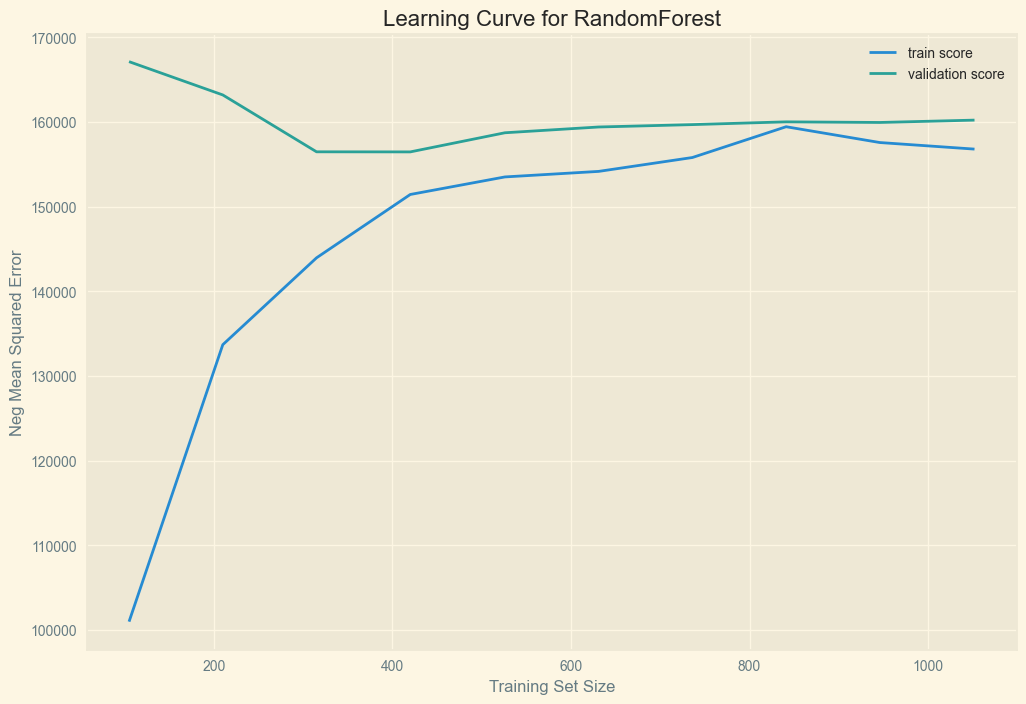

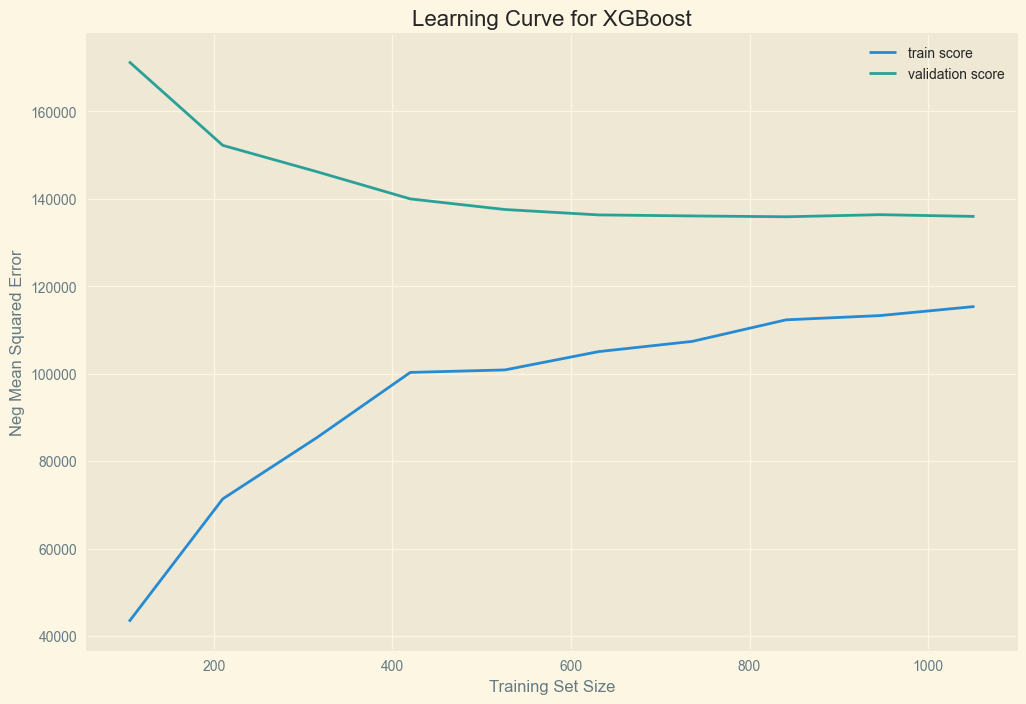

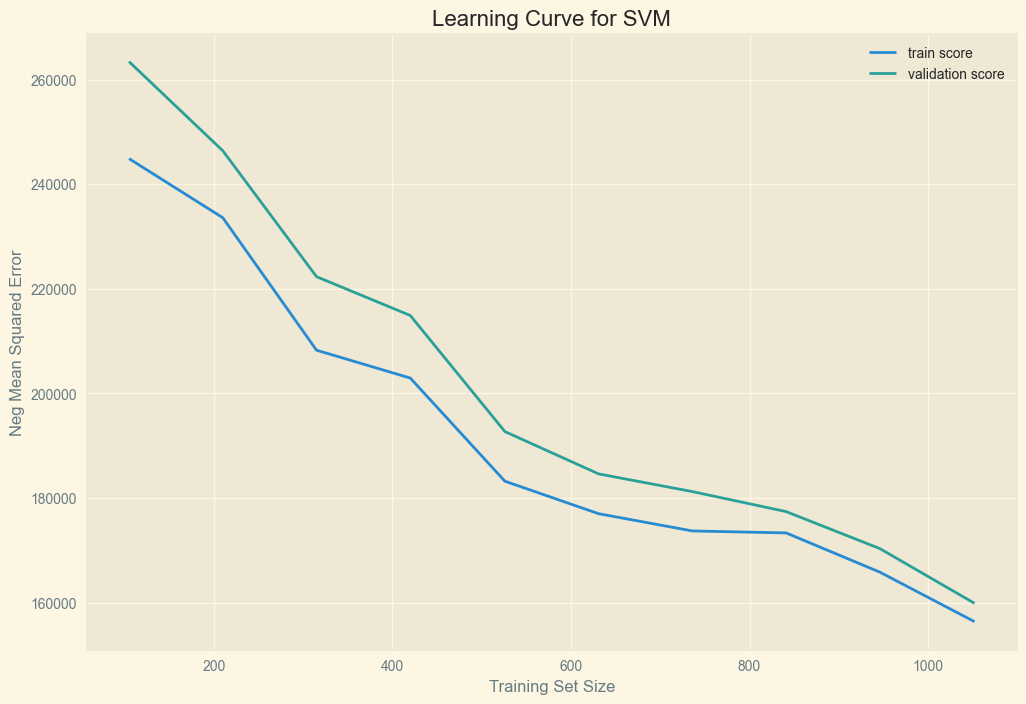

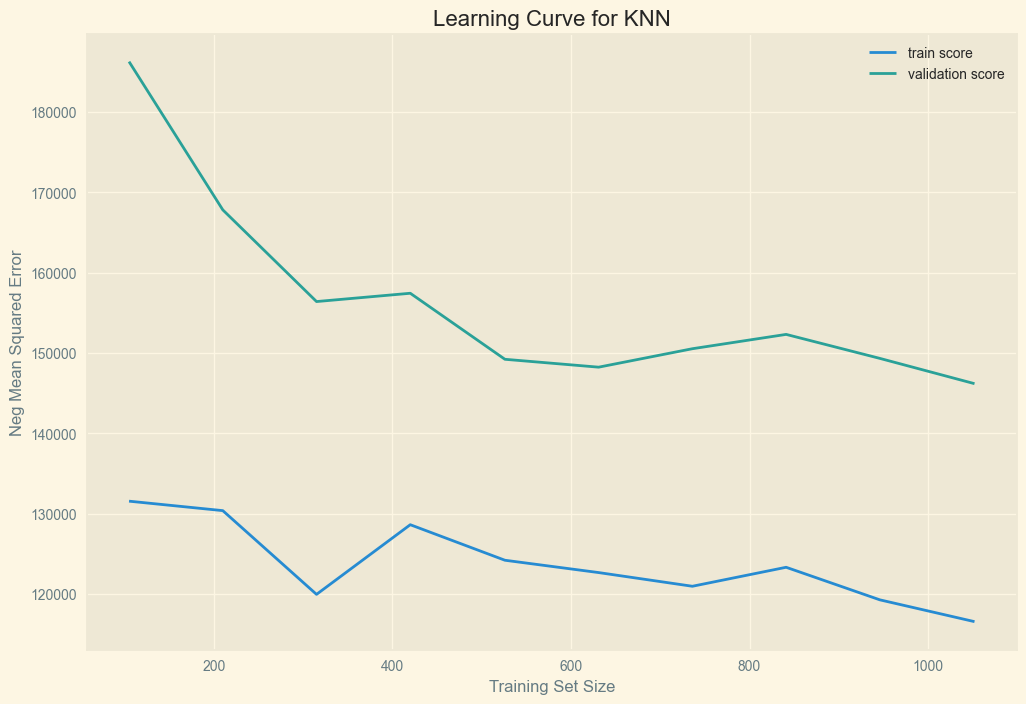

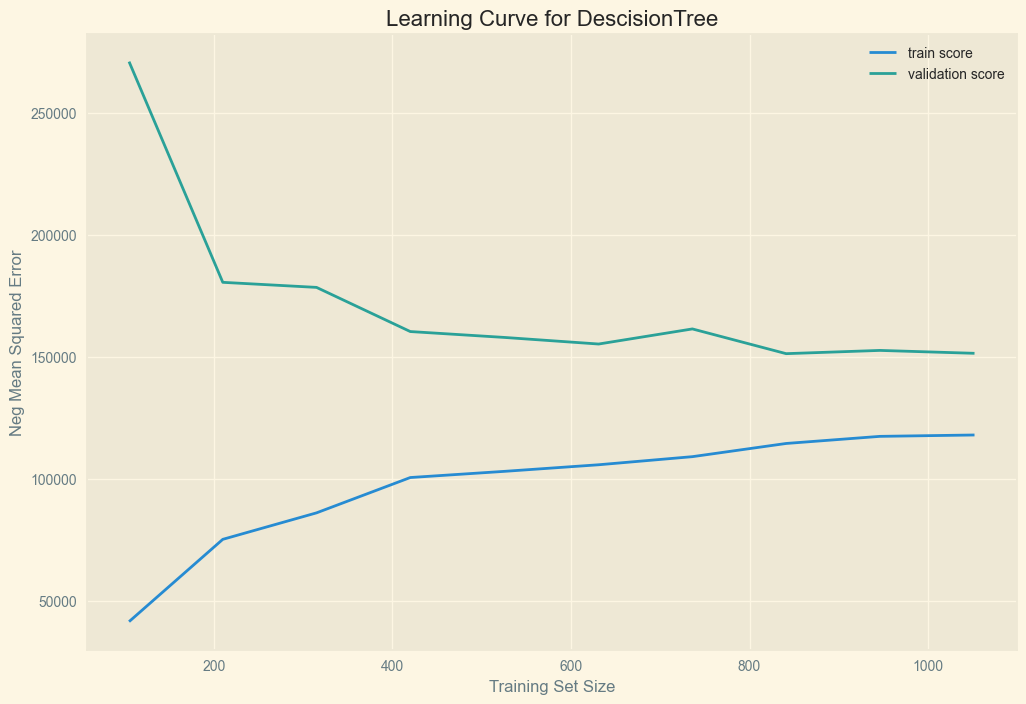

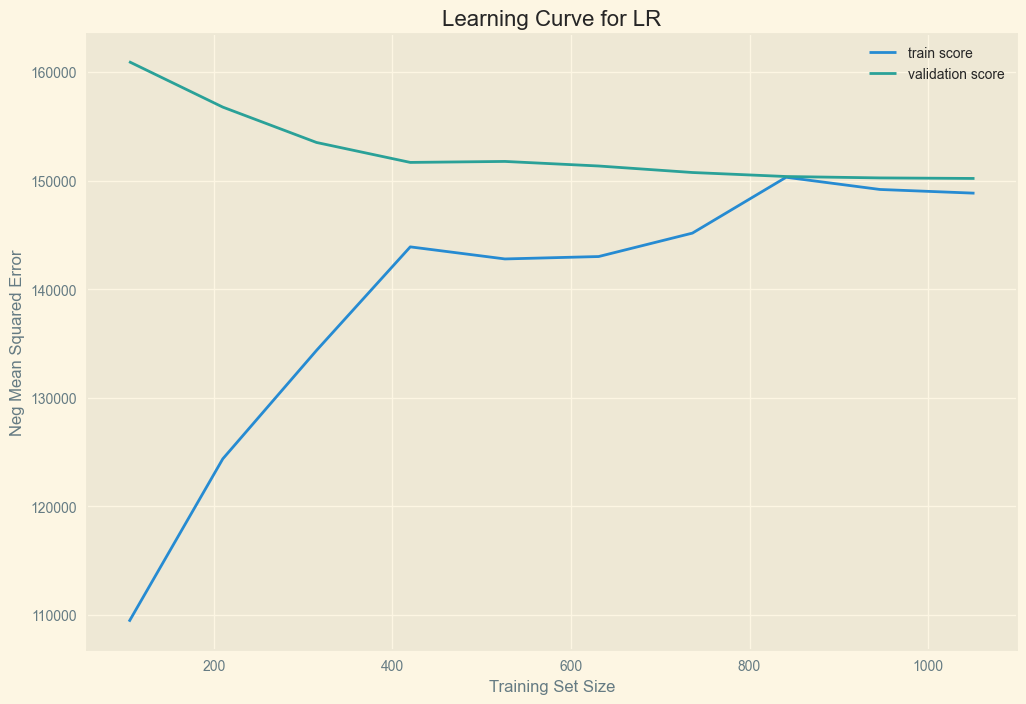

In [113]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def evaluation(model):
    model.fit(X_train, y_train)
    # making predictions
    y_pred = model.predict(X_test)

    # calculating mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error = ', mse)
    print('-')

    # calculating R2 score
    r2 = r2_score(y_test, y_pred)
    n = len(y_test) # sample size
    p = X_test.shape[1] # number of features
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print('R2 Score = ', r2)
    print('Adjusted R2 Score = ', adjusted_r2)
    print('-')

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='neg_mean_squared_error',
                                              train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12, 8))
    plt.plot(N, -train_score.mean(axis=1), label='train score')
    plt.plot(N, -val_score.mean(axis=1), label='validation score')
    plt.title(f'Learning Curve for {name}')  # Adding the model name to the title
    plt.xlabel('Training Set Size')
    plt.ylabel('Neg Mean Squared Error')
    plt.legend()
    return mse, r2

test = []
for name, model in dict_of_models.items():
    print('---------------------------------')
    print(name)
    t_metrics = {}
    mse, r2 = evaluation(model)
    t_metrics['Mean Squared Error'] = mse
    t_metrics['R2 Score'] = r2
    print(t_metrics)
    test.append(t_metrics)


### Visualising the Mean Squared Error & R2 Score 

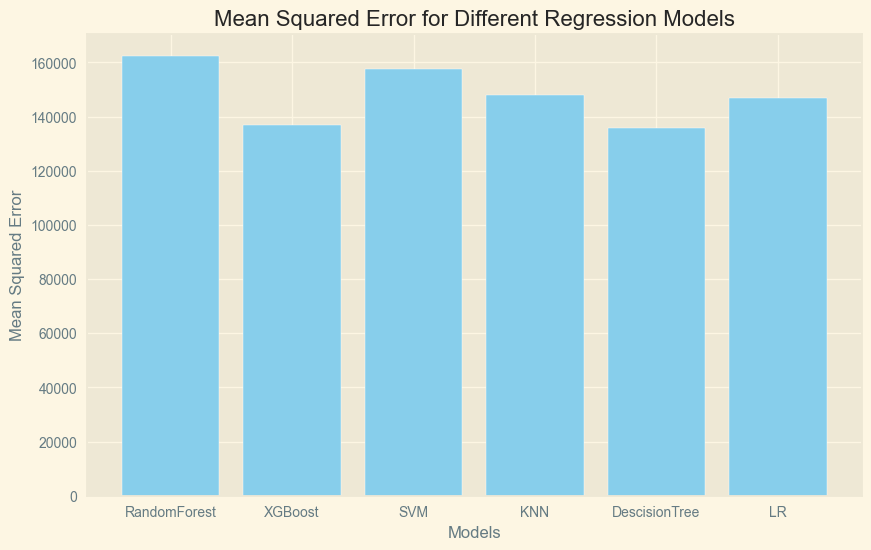

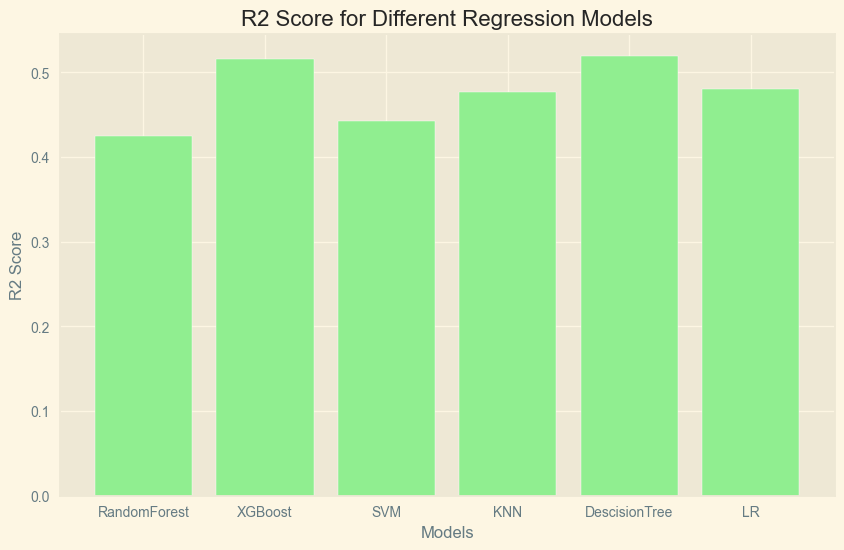

In [114]:
import matplotlib.pyplot as plt

# Assuming you have the list 'test' containing the metrics for each model

# Plot Mean Squared Error for each model
models = list(dict_of_models.keys())
mse_values = [item['Mean Squared Error'] for item in test]
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error for Different Regression Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()

# Plot R2 Score for each model
r2_values = [item['R2 Score'] for item in test]
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='lightgreen')
plt.title('R2 Score for Different Regression Models')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.show()

# Merging Best Regression and CNN 

In [115]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [117]:
import cv2
import numpy as np
from keras.models import load_model

# Load the trained model
model_path = 'Cnn_Model.h5'
model = load_model(model_path, compile=False)

# Load and preprocess the new image
new_image_path = '2603.jpg'  # Replace with the path to your new image
new_image = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)
new_image = cv2.resize(new_image, (64, 64))
new_image = new_image.reshape((1, 64, 64, 1)) / 255.0  # Normalize to [0,1]

# Predict age and gender
predictions = model.predict(new_image)
predicted_age = int(predictions[0][0] * 100.0)  # Rescale age prediction
predicted_gender = "Male" if predictions[1][0] < 0.5 else "Female"

# Print the predictions
print("Predicted Age:", predicted_age)
print("Predicted Gender:", predicted_gender)

1/1 [==============================] - 0s 338ms/step
Predicted Age: 29
Predicted Gender: Male


### User Input Structure

In [ ]:
tesData = []

# Append the questionnaire values to tesData

# Validate region input
# Prompt user for region input with validation
while True:
    try:
        bmi = float(input("Enter your BMI: "))
        valid_bmi = 0 <= bmi <= 99
        if valid_bmi:
            break
        else:
            print("Invalid input for BMI. Please enter a valid float between 0 and 99.")
    except ValueError:
        print("Invalid input for BMI. Please enter a valid float.")


while True:
    try:
        children = int(input("How many children do you have (0 to 5): "))
        valid_children = 0 <= children <= 5
        if valid_children:
            break
        else:
            print("Invalid input for the number of children. Please enter an integer between 0 and 5.")
    except ValueError:
        print("Invalid input for the number of children. Please enter a valid integer.")

smoker = input("Are you a smoker? (yes or no): ").lower()

# Validate smoker input
if smoker not in ['yes', 'no']:
    print("Invalid input for smoking status. Please enter 'yes' or 'no'.")
    exit()

while True:
    region = input("Enter your region ('southwest', 'southeast', 'northwest', 'northeast'): ")
    valid_regions = ['southwest', 'southeast', 'northwest', 'northeast']

    if region.lower() in valid_regions:
        break
    else:
        print("Invalid input for region. Please enter a valid region.")

### Appending Data and creating labels for Gender, Region and BM
* This will help in ease of processing of data and show usefulness in final result

In [ ]:
# Append the questionnaire values to tesData
tesData.append(predicted_age)
tesData.append(1 if predicted_gender == 'Female' else 0)
tesData.append(bmi)
tesData.append(children)
tesData.append(1 if smoker == 'yes' else 0)  # Convert 'yes' to 1 and 'no' to 0
tesData.append({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}[region])

# Reshape tesData to a 2D array
input_data = np.array([tesData])
best_model = dict_of_models['DescisionForest']

# Predict with the reshaped data
predicted_value = best_model.predict(input_data)
predicted_value = np.round(predicted_value, 2)

# Extract values from tesData
age, gender, bmi, children, smoker, region = (
    tesData[0],
    "Female" if tesData[1] == 1 else "Male",
    tesData[2],
    tesData[3],
    "Yes" if tesData[4] == 1 else "No",
    list({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}.keys())[
        list({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}.values()).index(
            tesData[5]
        )
    ],
)
name = input("Enter your Name: ")
# Calculate BMI category
if bmi < 18.5:
    bmi_category = "Underweight"
elif 18.5 <= bmi < 25:
    bmi_category = "Normal weight"
elif 25 <= bmi < 30:
    bmi_category = "Overweight"
else:
    bmi_category = "Obese"

### Final Output 
* With CNN predicting the age and gender from the uploaded image. And based on user input data, giving prediction for the Insurance Premium

In [ ]:
# Print detailed output as a paragraph
print()
print("==================================================================================")
print("Disclaimer: Please note that this is a prediction, and actual costs may differ based on additional factors.")
print("(Predicted Age may vary)")
print("==================================================================================")

print("As per out model your predictions for Premium Estimate are here. The report states that:\n")
print(f"The Medical Premium estimate for an individual named {name}, aged {age}, is as follows:")
print(f"This person is {gender} with a Body Mass Index (BMI) of {bmi}, categorizing them as {bmi_category}.")
print(f"They have {children} children and is currently a {smoker} in terms of smoking status.")
print(f"Their residence is in the {region} region.")
print(f"The predicted financial charge for this individual is approximately £{predicted_value[0]}.")

print("==================================================================================")


Disclaimer: Please note that this is a prediction, and actual costs may differ based on additional factors.
(Predicted Age may vary)
As per out model your predictions for Premium Estimate are here. The report states that:

The Medical Premium estimate for an individual named Tom, aged 29, is as follows:
This person is Male with a Body Mass Index (BMI) of 23.5, categorizing them as Normal weight.
They have 2 children and are currently a No in terms of smoking status.
Their residence is in the southwest region.
The predicted financial charge for this individual is approximately £619.16.
